# Merge Fors2, Galex and Kids


- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023-06-08



From this mergin work on spectra and photometry can start

In [1]:
import h5py
import pandas as pd
import numpy as np
import os
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
def GetColumnHfData(hff,list_of_keys,nameval):
    """
    Extract hff atttribute 
    
    parameters
      hff           : descriptor of h5 file
      list_of_keys : list of exposures
      nameval      : name of the attribute
      
    return
           the array of values in the order of 
    """
    all_data = []
    for key in list_of_keys:
        group=hff.get(key)
        val=group.attrs[nameval]
        all_data.append(val)
    return all_data


In [3]:
def ReadFors2h5FileAttributes(hf):
    hf =  h5py.File(input_file_h5, 'r') 
    list_of_keys = list(hf.keys())
    # pick one key    
    key_sel =  list_of_keys[0]
    # pick one group
    group = hf.get(key_sel)  
    #pickup all attribute names
    all_subgroup_keys = []
    for k in group.attrs.keys():
        all_subgroup_keys.append(k)
    # create info
    df_info = pd.DataFrame()
    for key in all_subgroup_keys:
        arr=GetColumnHfData(hf, list_of_keys ,key)
        df_info[key] = arr
    df_info.sort_values(by="num", ascending=True,inplace=True)
    df_info_num = df_info["num"].values
    key_tags = [ f"SPEC{num}" for num in df_info_num ]
    df_info["name"] = key_tags
    
    #'Nsp', 'RT', 'RV', 'Rmag', 'dec', 'eRV', 'lines', 'num', 'ra', 'redshift',
    
    df_info = df_info[['num' ,'name', 'ra', 'dec', 'Rmag','redshift','lines','RT','RV','eRV','Nsp']]
    return df_info

# Read Fors2

In [4]:
input_file_h5  = '../data/FORS2spectra.hdf5'

In [5]:
hf =  h5py.File(input_file_h5, 'r') 
list_of_keys = list(hf.keys())

In [6]:
df_info = ReadFors2h5FileAttributes(hf)

In [7]:
df_info.reset_index(drop=True, inplace=True) 

In [8]:
df_info

,num,name,ra,dec,Rmag,redshift,lines,RT,RV,eRV,Nsp
0,2,SPEC2,13.52997,-28.44776,21.18,0.34555,"b'K,H,G,H{beta} ...",12.3,103665,40,1
1,3,SPEC3,13.52552,-28.42080,21.45,0.68660,"b'[OII],H9,K,H,H{beta},[OIII],H8 ...",11.6,210642,48,4
2,9,SPEC9,13.50219,-28.40641,21.60,0.29266,"b'H9,H8,K,H ...",13.1,87798,58,1
3,13,SPEC13,13.49261,-28.38272,23.14,0.68870,"b'[OII],H{epsilon},H{delta},H{beta} ...",0.0,206610,0,1
4,19,SPEC19,13.60758,-28.43452,21.70,0.48395,"b'H10,H9,H8,K,H,H{delta} ...",7.1,145185,104,1
...,...,...,...,...,...,...,...,...,...,...,...
545,734,SPEC734,13.68083,-28.23290,0.00,0.23012,"b'[OII],H9,K,H,H{alpha},NII ...",7.2,69036,71,1
546,735,SPEC735,13.69958,-28.23161,19.28,0.36169,"b'K,H,G,H{beta} ...",8.2,108507,107,1
547,736,SPEC736,13.66431,-28.22849,21.64,0.55777,"b'[OII],H9,H{beta},[OIII] ...",10.5,167331,31,1
548,737,SPEC737,13.62722,-28.22692,21.40,0.52001,"b'[OII],K,H ...",10.2,156003,53,1


### Get Spectra

In [9]:
df_info_num = df_info["num"].values
key_tags = [ f"SPEC{num}" for num in df_info_num ]

In [10]:
all_df = []   
idx=0
for key in key_tags :
    group = hf.get(key)
    df = pd.DataFrame()
    df["wl"] = np.array(group.get("wl"))
    df["fl"] = np.array(group.get("fl")) 
    all_df.append(df)
    idx+=1

# Get merged catalogs

- Be sure to use MAST results for Galex

In [11]:
catalog_galex_filename = "../data/results_crossmathcatalogs/info_fors2GALEX_frommast_crossmatch.csv"
catalog_kids_filename = "../data/results_crossmathcatalogs/info_fors2Kidscrossmatch.csv"

In [12]:
df_info_galex = pd.read_csv(catalog_galex_filename,index_col=0)

In [13]:
df_info_galex.rename(columns={"angularsep":"asep_galex"},inplace=True)

In [14]:
df_info_galex

,num,ra,dec,Rmag,redshift,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr,asep_galex
0,2,13.52997,-28.44776,21.18,0.34555,13.531423,-28.456012,20.422865,21.145170,0.252426,0.255224,24.595520,12.645368,5.716900,2.971828,30.060347
1,3,13.52552,-28.42080,21.45,0.68660,13.524429,-28.415100,NaN,22.173336,NaN,0.472773,NaN,4.905293,NaN,2.135443,20.808473
2,9,13.50219,-28.40641,21.60,0.29266,13.493582,-28.404687,NaN,21.510794,NaN,0.360429,NaN,9.029878,NaN,2.996898,27.954317
3,13,13.49261,-28.38272,23.14,0.68870,13.488292,-28.374033,NaN,22.629692,NaN,0.543497,NaN,3.221977,NaN,1.612464,34.131891
4,19,13.60758,-28.43452,21.70,0.48395,13.602319,-28.443209,NaN,21.152737,NaN,0.287115,NaN,12.557550,NaN,3.319950,35.437832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012,13.672907,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.703300,7.885356,19.391645,25.387088
546,735,13.69958,-28.23161,19.28,0.36169,13.687228,-28.226752,20.512026,20.175917,0.277843,0.297318,22.656444,30.876852,5.796451,8.453250,42.903491
547,736,13.66431,-28.22849,21.64,0.55777,13.672907,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.703300,7.885356,19.391645,29.898930
548,737,13.62722,-28.22692,21.40,0.52001,13.628613,-28.230257,21.295267,21.704386,0.383258,0.396922,11.012729,7.555190,3.886483,2.761346,12.801767


In [15]:
df_info_kids = pd.read_csv(catalog_kids_filename,index_col=0)

In [16]:
df_info_kids.rename(columns={"angularsep":"asep_kids"},inplace=True)

In [17]:
df_info_kids

,num,ra,dec,Rmag,redshift,ID,KIDS_TILE,RAJ2000,DECJ2000,FLUX_RADIUS,...,FLUXERR_GAAP_H,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,asep_kids
0,2,13.52997,-28.44776,21.18,0.34555,KiDSDR4 J005407.202-282652.18,KIDS_13.5_-28.2,13.530012,-28.447828,2.967994,...,594.538760,17751.280000,694.397200,0.64,0.65,0.072517,0.056505,0.039090,0.029048,0.278569
1,3,13.52552,-28.42080,21.45,0.68660,KiDSDR4 J005406.135-282515.22,KIDS_13.5_-28.2,13.525566,-28.420897,3.020974,...,588.559448,17807.927734,685.337463,0.76,0.76,0.075065,0.058490,0.040463,0.030069,0.378354
2,9,13.50219,-28.40641,21.60,0.29266,KiDSDR4 J005400.531-282423.36,KIDS_13.5_-28.2,13.502216,-28.406491,2.671784,...,579.864075,6177.433594,606.197693,0.38,0.24,0.074299,0.057893,0.040050,0.029762,0.303000
3,13,13.49261,-28.38272,23.14,0.68870,KiDSDR4 J005358.235-282258.04,KIDS_13.5_-28.2,13.492649,-28.382790,2.192928,...,NaN,NaN,NaN,0.79,0.79,0.077572,0.060444,0.041815,0.031073,0.280645
4,19,13.60758,-28.43452,21.70,0.48395,KiDSDR4 J005425.830-282604.52,KIDS_13.5_-28.2,13.607625,-28.434589,2.992076,...,544.024658,8170.591309,507.931976,0.38,0.39,0.075642,0.058940,0.040774,0.030300,0.286350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012,KiDSDR4 J005443.393-281358.14,KIDS_13.5_-28.2,13.680807,-28.232817,3.462931,...,461.214691,23504.554688,495.400299,0.16,0.15,0.073033,0.056906,0.039368,0.029254,0.307576
546,735,13.69958,-28.23161,19.28,0.36169,KiDSDR4 J005447.902-281354.13,KIDS_13.5_-28.2,13.699594,-28.231703,3.587435,...,479.774139,63621.417969,521.821655,0.40,0.40,0.072326,0.056356,0.038987,0.028971,0.337732
547,736,13.66431,-28.22849,21.64,0.55777,KiDSDR4 J005439.434-281343.01,KIDS_13.5_-28.2,13.664309,-28.228614,4.769248,...,429.756744,3066.119873,456.459747,0.55,0.56,0.074087,0.057728,0.039936,0.029677,0.446411
548,737,13.62722,-28.22692,21.40,0.52001,KiDSDR4 J005430.535-281337.17,KIDS_13.5_-28.2,13.627233,-28.226992,2.864109,...,419.079620,13462.809570,434.556122,0.70,0.70,0.079347,0.061827,0.042772,0.031784,0.262459


## Merge dataframes

In [18]:
df = pd.merge(df_info_galex,df_info_kids)

In [19]:
df

,num,ra,dec,Rmag,redshift,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,...,FLUXERR_GAAP_H,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,asep_kids
0,2,13.52997,-28.44776,21.18,0.34555,13.531423,-28.456012,20.422865,21.145170,0.252426,...,594.538760,17751.280000,694.397200,0.64,0.65,0.072517,0.056505,0.039090,0.029048,0.278569
1,3,13.52552,-28.42080,21.45,0.68660,13.524429,-28.415100,NaN,22.173336,NaN,...,588.559448,17807.927734,685.337463,0.76,0.76,0.075065,0.058490,0.040463,0.030069,0.378354
2,9,13.50219,-28.40641,21.60,0.29266,13.493582,-28.404687,NaN,21.510794,NaN,...,579.864075,6177.433594,606.197693,0.38,0.24,0.074299,0.057893,0.040050,0.029762,0.303000
3,13,13.49261,-28.38272,23.14,0.68870,13.488292,-28.374033,NaN,22.629692,NaN,...,NaN,NaN,NaN,0.79,0.79,0.077572,0.060444,0.041815,0.031073,0.280645
4,19,13.60758,-28.43452,21.70,0.48395,13.602319,-28.443209,NaN,21.152737,NaN,...,544.024658,8170.591309,507.931976,0.38,0.39,0.075642,0.058940,0.040774,0.030300,0.286350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012,13.672907,-28.231896,19.537182,16.488522,0.154001,...,461.214691,23504.554688,495.400299,0.16,0.15,0.073033,0.056906,0.039368,0.029254,0.307576
546,735,13.69958,-28.23161,19.28,0.36169,13.687228,-28.226752,20.512026,20.175917,0.277843,...,479.774139,63621.417969,521.821655,0.40,0.40,0.072326,0.056356,0.038987,0.028971,0.337732
547,736,13.66431,-28.22849,21.64,0.55777,13.672907,-28.231896,19.537182,16.488522,0.154001,...,429.756744,3066.119873,456.459747,0.55,0.56,0.074087,0.057728,0.039936,0.029677,0.446411
548,737,13.62722,-28.22692,21.40,0.52001,13.628613,-28.230257,21.295267,21.704386,0.383258,...,419.079620,13462.809570,434.556122,0.70,0.70,0.079347,0.061827,0.042772,0.031784,0.262459


In [20]:
df["lines"] = df_info["lines"]

In [21]:
df

,num,ra,dec,Rmag,redshift,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,...,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,asep_kids,lines
0,2,13.52997,-28.44776,21.18,0.34555,13.531423,-28.456012,20.422865,21.145170,0.252426,...,17751.280000,694.397200,0.64,0.65,0.072517,0.056505,0.039090,0.029048,0.278569,"b'K,H,G,H{beta} ..."
1,3,13.52552,-28.42080,21.45,0.68660,13.524429,-28.415100,NaN,22.173336,NaN,...,17807.927734,685.337463,0.76,0.76,0.075065,0.058490,0.040463,0.030069,0.378354,"b'[OII],H9,K,H,H{beta},[OIII],H8 ..."
2,9,13.50219,-28.40641,21.60,0.29266,13.493582,-28.404687,NaN,21.510794,NaN,...,6177.433594,606.197693,0.38,0.24,0.074299,0.057893,0.040050,0.029762,0.303000,"b'H9,H8,K,H ..."
3,13,13.49261,-28.38272,23.14,0.68870,13.488292,-28.374033,NaN,22.629692,NaN,...,NaN,NaN,0.79,0.79,0.077572,0.060444,0.041815,0.031073,0.280645,"b'[OII],H{epsilon},H{delta},H{beta} ..."
4,19,13.60758,-28.43452,21.70,0.48395,13.602319,-28.443209,NaN,21.152737,NaN,...,8170.591309,507.931976,0.38,0.39,0.075642,0.058940,0.040774,0.030300,0.286350,"b'H10,H9,H8,K,H,H{delta} ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012,13.672907,-28.231896,19.537182,16.488522,0.154001,...,23504.554688,495.400299,0.16,0.15,0.073033,0.056906,0.039368,0.029254,0.307576,"b'[OII],H9,K,H,H{alpha},NII ..."
546,735,13.69958,-28.23161,19.28,0.36169,13.687228,-28.226752,20.512026,20.175917,0.277843,...,63621.417969,521.821655,0.40,0.40,0.072326,0.056356,0.038987,0.028971,0.337732,"b'K,H,G,H{beta} ..."
547,736,13.66431,-28.22849,21.64,0.55777,13.672907,-28.231896,19.537182,16.488522,0.154001,...,3066.119873,456.459747,0.55,0.56,0.074087,0.057728,0.039936,0.029677,0.446411,"b'[OII],H9,H{beta},[OIII] ..."
548,737,13.62722,-28.22692,21.40,0.52001,13.628613,-28.230257,21.295267,21.704386,0.383258,...,13462.809570,434.556122,0.70,0.70,0.079347,0.061827,0.042772,0.031784,0.262459,"b'[OII],K,H ..."


# Select good match with galex

array([[<AxesSubplot:title={'center':'asep_galex'}>]], dtype=object)

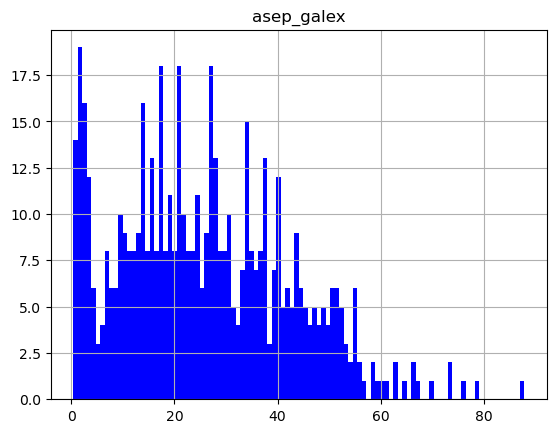

In [22]:
df.hist("asep_galex",bins=100,color="b")

array([[<AxesSubplot:title={'center':'asep_kids'}>]], dtype=object)

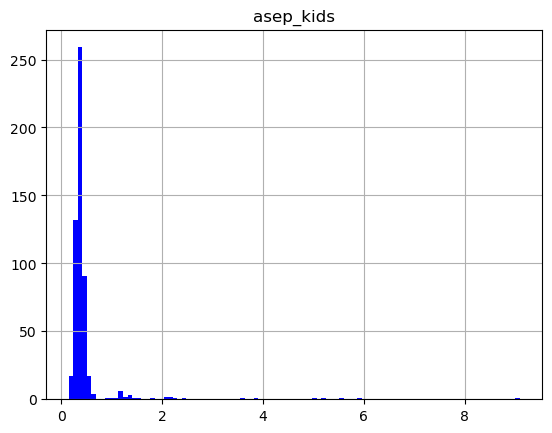

In [24]:
df.hist("asep_kids",bins=100,color='b')

## Select  Those spectra having GALEX

In [25]:
df = df[df["asep_galex"] < 5]

## Remove NaN

- remove those row with no FUV

In [26]:
#df = df.dropna()

## Remove rows with Rmag = 0

In [27]:
#df = df[df["Rmag"] > 0]

In [44]:
df.columns

Index(['num', 'ra', 'dec', 'Rmag', 'redshift', 'ra_galex', 'dec_galex',
       'fuv_mag', 'nuv_mag', 'fuv_magerr', 'nuv_magerr', 'fuv_flux',
       'nuv_flux', 'fuv_fluxerr', 'nuv_fluxerr', 'asep_galex', 'ID',
       'KIDS_TILE', 'RAJ2000', 'DECJ2000', 'FLUX_RADIUS', 'CLASS_STAR',
       'MAG_GAAP_u', 'MAG_GAAP_g', 'MAG_GAAP_r', 'MAG_GAAP_i', 'MAG_GAAP_Z',
       'MAG_GAAP_Y', 'MAG_GAAP_J', 'MAG_GAAP_H', 'MAG_GAAP_Ks',
       'MAGERR_GAAP_u', 'MAGERR_GAAP_g', 'MAGERR_GAAP_r', 'MAGERR_GAAP_i',
       'MAGERR_GAAP_Z', 'MAGERR_GAAP_Y', 'MAGERR_GAAP_J', 'MAGERR_GAAP_H',
       'MAGERR_GAAP_Ks', 'FLUX_GAAP_u', 'FLUXERR_GAAP_u', 'FLUX_GAAP_g',
       'FLUXERR_GAAP_g', 'FLUX_GAAP_r', 'FLUXERR_GAAP_r', 'FLUX_GAAP_i',
       'FLUXERR_GAAP_i', 'FLUX_GAAP_Z', 'FLUXERR_GAAP_Z', 'FLUX_GAAP_Y',
       'FLUXERR_GAAP_Y', 'FLUX_GAAP_J', 'FLUXERR_GAAP_J', 'FLUX_GAAP_H',
       'FLUXERR_GAAP_H', 'FLUX_GAAP_Ks', 'FLUXERR_GAAP_Ks', 'Z_B', 'Z_ML',
       'EXTINCTION_u', 'EXTINCTION_g', 'EXTINCTION_r', 'EXTI

# Plot Spectra

https://en.wikipedia.org/wiki/Photometric_system

In [28]:
lambda_FUV = 1528.
lambda_NUV = 2271.
lambda_U = 3650.
lambda_B = 4450.
lambda_G = 4640.
lambda_R = 5580.
lambda_I = 8060.
lambda_Z = 9000.
lambda_Y = 10200.
lambda_J = 12200.
lambda_H = 16300.
lambda_K = 21900.
lambda_L = 34500.

WL = [lambda_FUV, lambda_NUV, lambda_B, lambda_G, lambda_R ,lambda_I, lambda_Z, lambda_Y, lambda_J, lambda_H, lambda_K ]

In [29]:
df

,num,ra,dec,Rmag,redshift,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,...,FLUX_GAAP_Ks,FLUXERR_GAAP_Ks,Z_B,Z_ML,EXTINCTION_u,EXTINCTION_g,EXTINCTION_r,EXTINCTION_i,asep_kids,lines
13,36,13.56870,-28.43129,19.96,0.82266,13.568381,-28.431563,NaN,21.742678,NaN,...,31244.492188,660.577942,1.00,1.00,0.075650,0.058946,0.040779,0.030303,0.149184,"b'[OII],H9,H8,K,H{beta},[OIII] ..."
38,85,13.53755,-28.38375,23.21,0.97900,13.538054,-28.383455,21.637587,NaN,0.460562,...,1662.387817,609.571655,0.60,1.52,0.080195,0.062487,0.043228,0.032123,0.259839,"b'MgII,[OII],H ..."
70,151,13.54459,-28.38795,22.23,0.49762,13.544825,-28.388740,NaN,22.456930,NaN,...,3084.036865,628.552673,0.86,1.21,0.080068,0.062388,0.043160,0.032072,0.403894,"b'[OII],K,H,H{beta} ..."
98,214,13.54850,-28.42296,19.80,0.29266,13.548439,-28.422414,NaN,22.062637,NaN,...,21491.597656,679.517578,0.23,0.23,0.076636,0.059715,0.041310,0.030698,0.509869,"b'[OII],H10,H9,H8,K,H,H{beta},[OIII] ..."
99,218,13.54348,-28.43490,21.27,0.43800,13.542637,-28.435506,NaN,21.881433,NaN,...,5140.696289,740.847229,0.34,0.34,0.073811,0.057513,0.039787,0.029566,0.380524,b'[OII] ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,722,13.69932,-28.26123,20.99,1.21050,13.699529,-28.261452,NaN,21.741745,NaN,...,4019.329102,514.735779,0.43,0.43,0.071443,0.055668,0.038511,0.028618,0.407676,"b'broad,MgII,(QSO) ..."
535,724,13.66411,-28.25705,21.07,0.23168,13.664060,-28.257300,NaN,22.904402,NaN,...,4453.878906,480.001190,0.32,0.32,0.070691,0.055082,0.038105,0.028316,0.240256,"b'[OII],H8,H,H{beta},[OIII],H{alpha} ..."
536,725,13.69168,-28.25586,20.86,0.23010,13.692175,-28.256077,NaN,22.222341,NaN,...,5093.774414,512.764404,0.19,0.18,0.071652,0.055831,0.038623,0.028701,0.358455,"b'[OII],H{beta},[OIII],H{alpha} ..."
538,727,13.69381,-28.25005,22.59,0.23060,13.694120,-28.250854,NaN,22.122770,NaN,...,1069.270508,536.854980,0.27,0.31,0.070389,0.054846,0.037942,0.028195,0.396801,"b'[OII],[OIII],H{alpha} ..."


In [30]:
df.columns

Index(['num', 'ra', 'dec', 'Rmag', 'redshift', 'ra_galex', 'dec_galex',
       'fuv_mag', 'nuv_mag', 'fuv_magerr', 'nuv_magerr', 'fuv_flux',
       'nuv_flux', 'fuv_fluxerr', 'nuv_fluxerr', 'asep_galex', 'ID',
       'KIDS_TILE', 'RAJ2000', 'DECJ2000', 'FLUX_RADIUS', 'CLASS_STAR',
       'MAG_GAAP_u', 'MAG_GAAP_g', 'MAG_GAAP_r', 'MAG_GAAP_i', 'MAG_GAAP_Z',
       'MAG_GAAP_Y', 'MAG_GAAP_J', 'MAG_GAAP_H', 'MAG_GAAP_Ks',
       'MAGERR_GAAP_u', 'MAGERR_GAAP_g', 'MAGERR_GAAP_r', 'MAGERR_GAAP_i',
       'MAGERR_GAAP_Z', 'MAGERR_GAAP_Y', 'MAGERR_GAAP_J', 'MAGERR_GAAP_H',
       'MAGERR_GAAP_Ks', 'FLUX_GAAP_u', 'FLUXERR_GAAP_u', 'FLUX_GAAP_g',
       'FLUXERR_GAAP_g', 'FLUX_GAAP_r', 'FLUXERR_GAAP_r', 'FLUX_GAAP_i',
       'FLUXERR_GAAP_i', 'FLUX_GAAP_Z', 'FLUXERR_GAAP_Z', 'FLUX_GAAP_Y',
       'FLUXERR_GAAP_Y', 'FLUX_GAAP_J', 'FLUXERR_GAAP_J', 'FLUX_GAAP_H',
       'FLUXERR_GAAP_H', 'FLUX_GAAP_Ks', 'FLUXERR_GAAP_Ks', 'Z_B', 'Z_ML',
       'EXTINCTION_u', 'EXTINCTION_g', 'EXTINCTION_r', 'EXTI

# Plot

## Plot Magnitude correlation

In [31]:
df_rmag = df[df["Rmag"] > 0]

<AxesSubplot:title={'center':'Kids R magnitude vs Fors2 R Petrosian magnitude'}, xlabel='Rmag', ylabel='MAG_GAAP_r'>

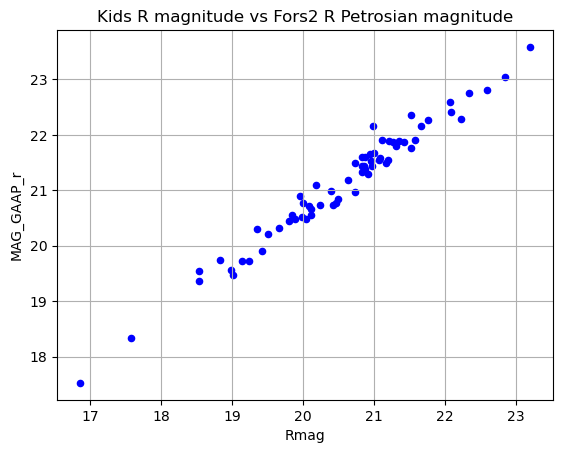

In [32]:
df_rmag.plot.scatter(x="Rmag",y="MAG_GAAP_r",color="b",title="Kids R magnitude vs Fors2 R Petrosian magnitude",grid=True)

# Plots

13  ==  36
b'[OII],H9,H8,K,H{beta},[OIII]                                                \r'


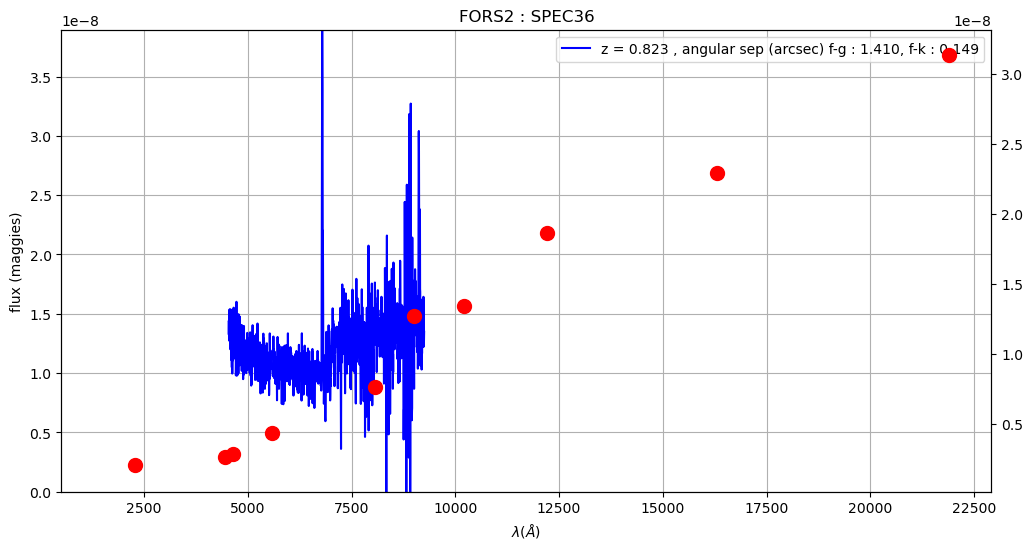

38  ==  85
b'MgII,[OII],H                                                                \r'


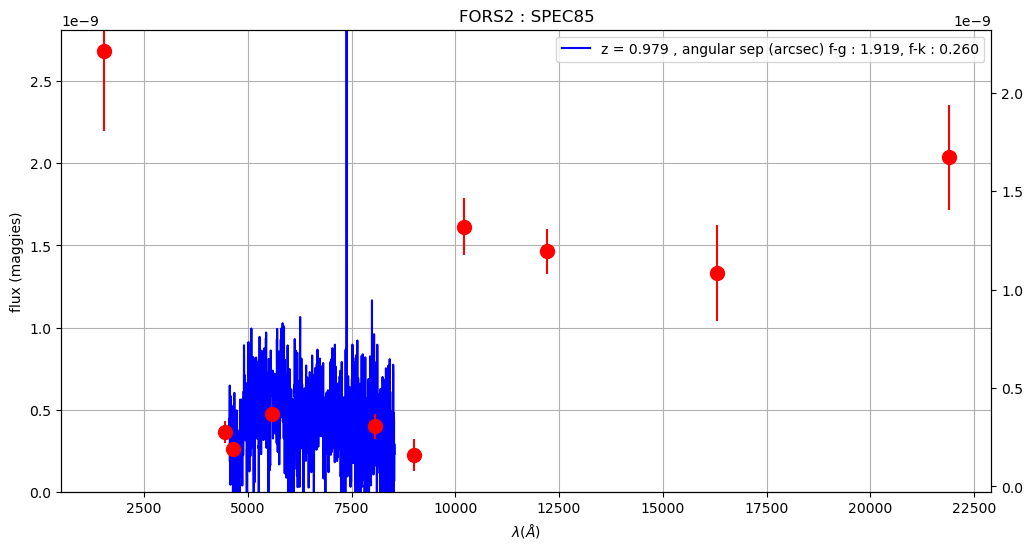

70  ==  151
b'[OII],K,H,H{beta}                                                           \r'


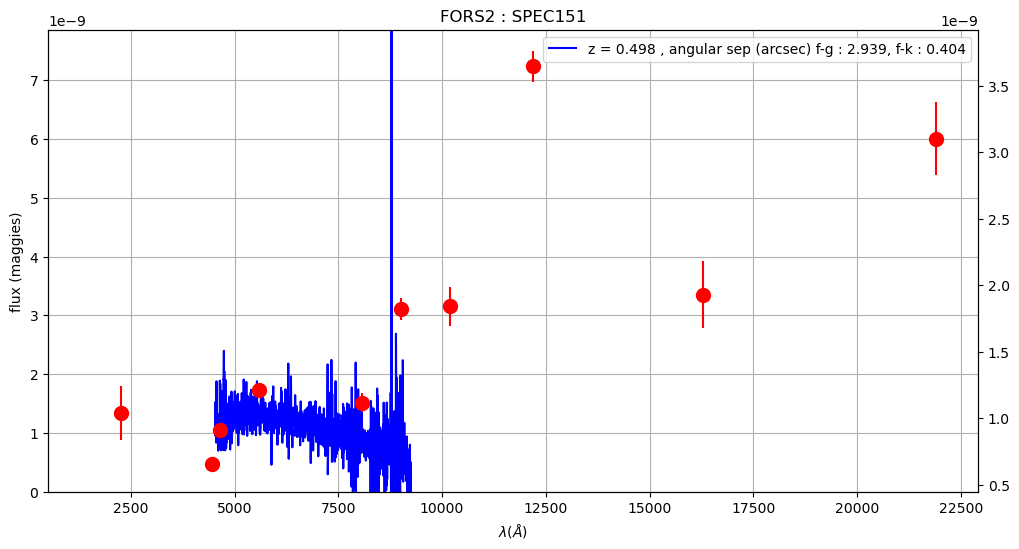

98  ==  214
b'[OII],H10,H9,H8,K,H,H{beta},[OIII]                                          \r'


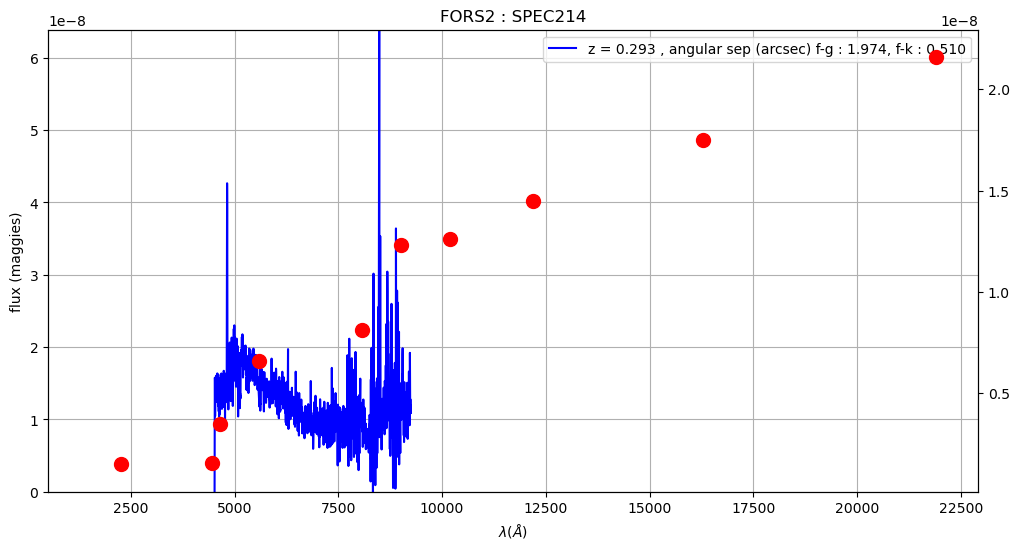

99  ==  218
b'[OII]                                                                       \r'


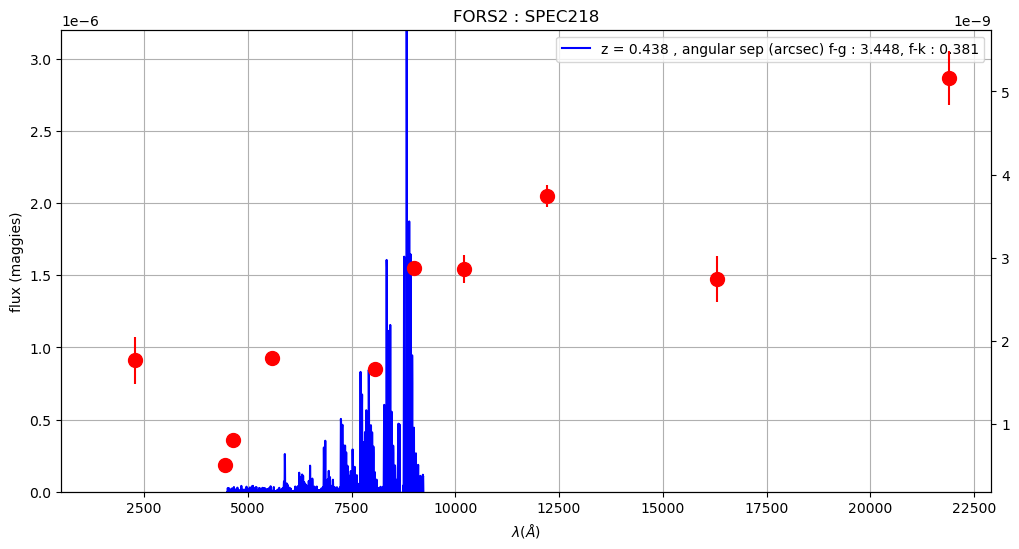

113  ==  242
b'[OIII],H{alpha}                                                             \r'


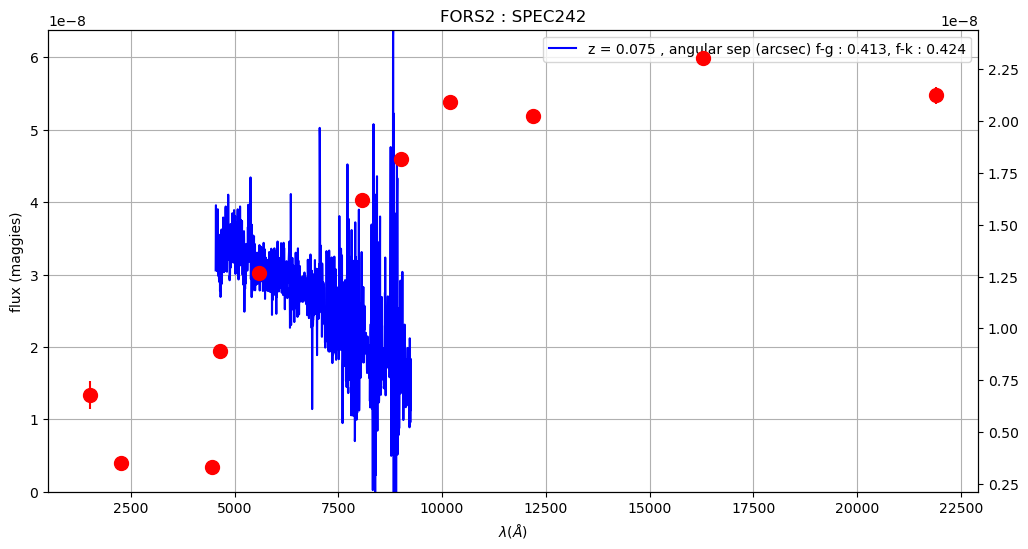

158  ==  306
b'MgII,[OII],H10,H9,K                                                         \r'


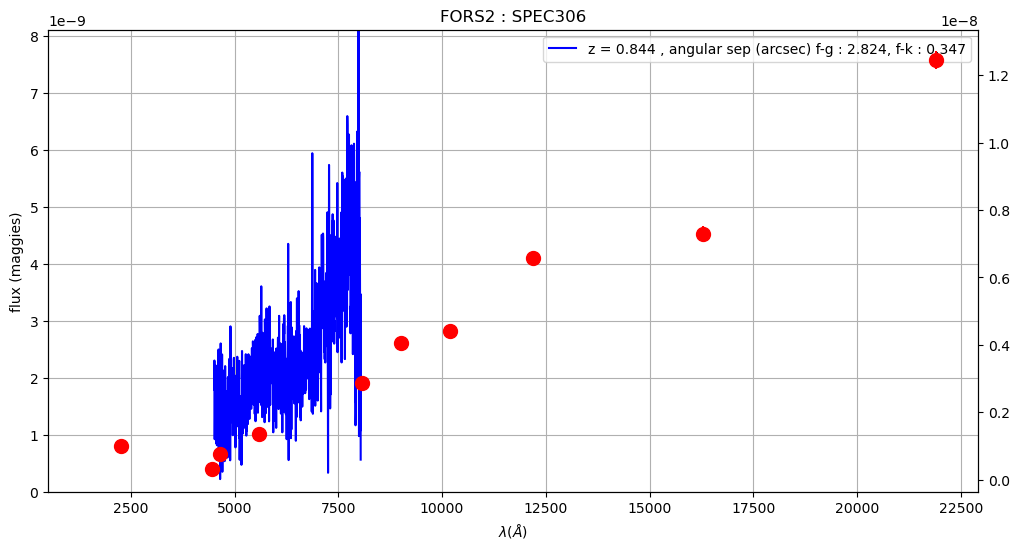

159  ==  307
b'[OII],H{alpha}                                                              \r'


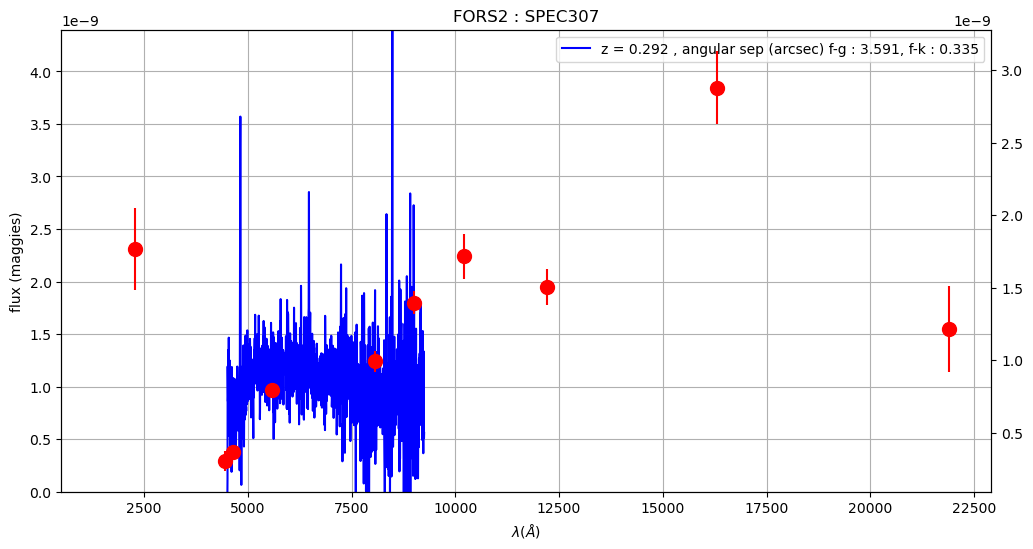

163  ==  315
b'[OII],H{beta}                                                               \r'


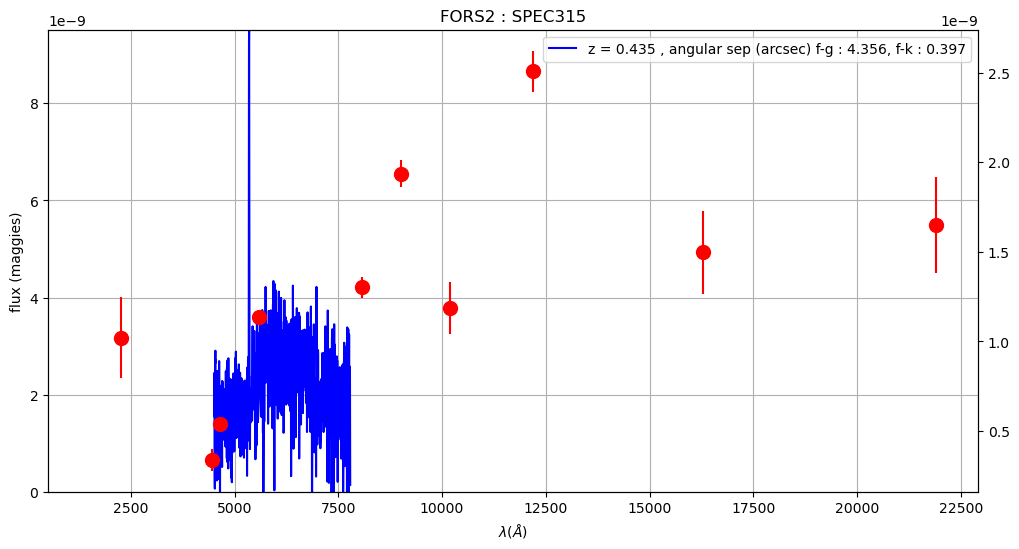

171  ==  325
b'[OII],H10,H9,H8,H,H{delta},H{beta},[OIII],H{alpha}                          \r'


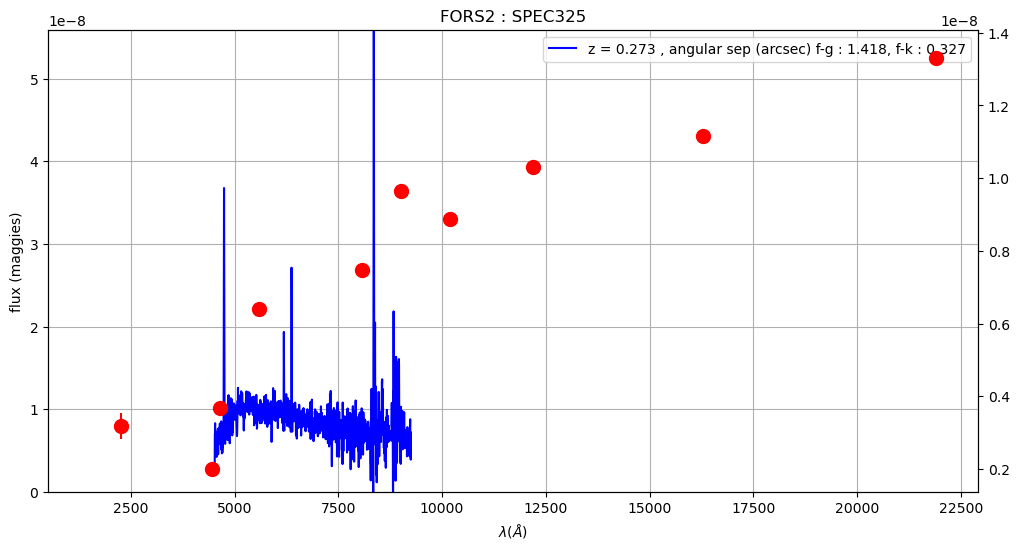

172  ==  326
b'[OII],H9,K,H,[OIII],H{alpha}                                                \r'


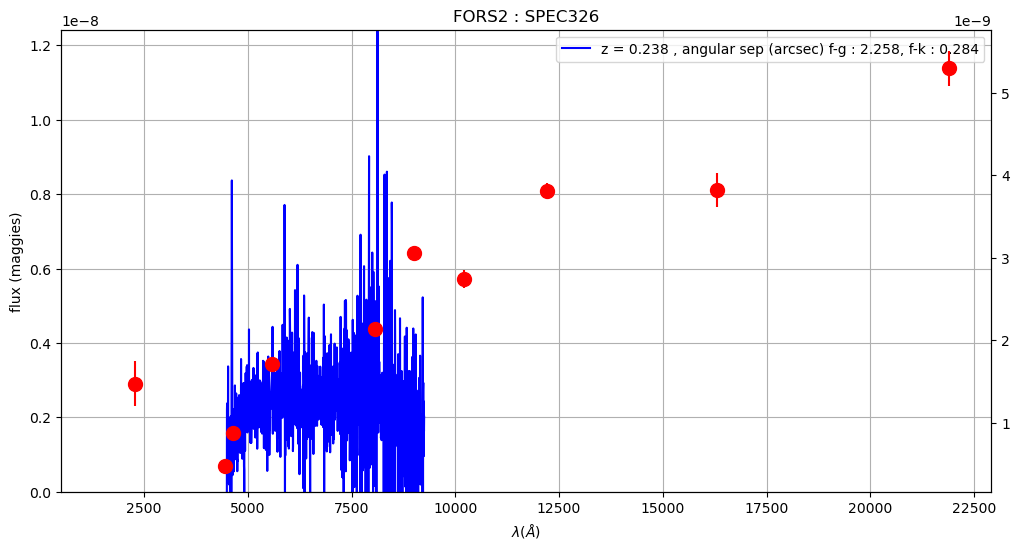

182  ==  337
b'[OII],H                                                                     \r'


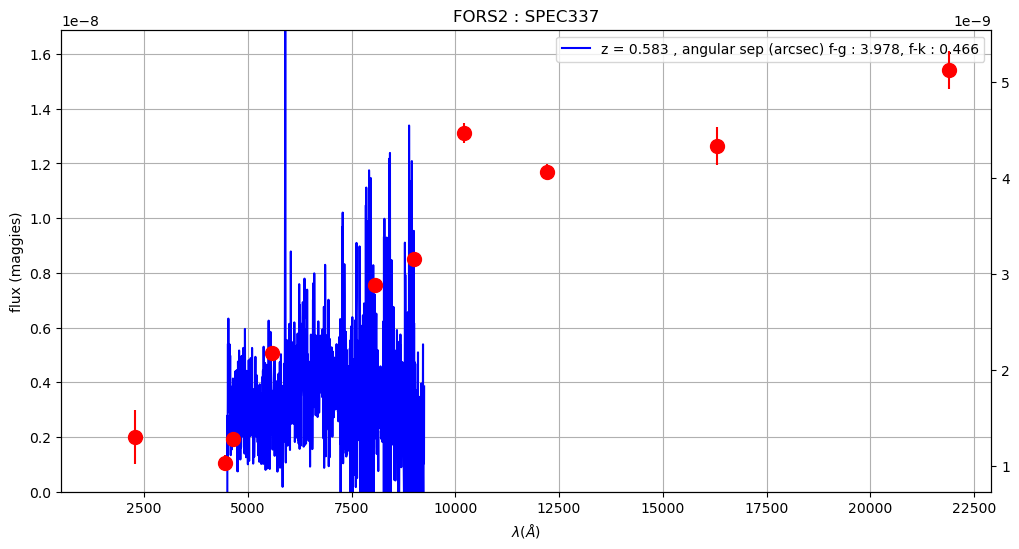

193  ==  350
b'[OII],H{beta},[OIII]                                                        \r'


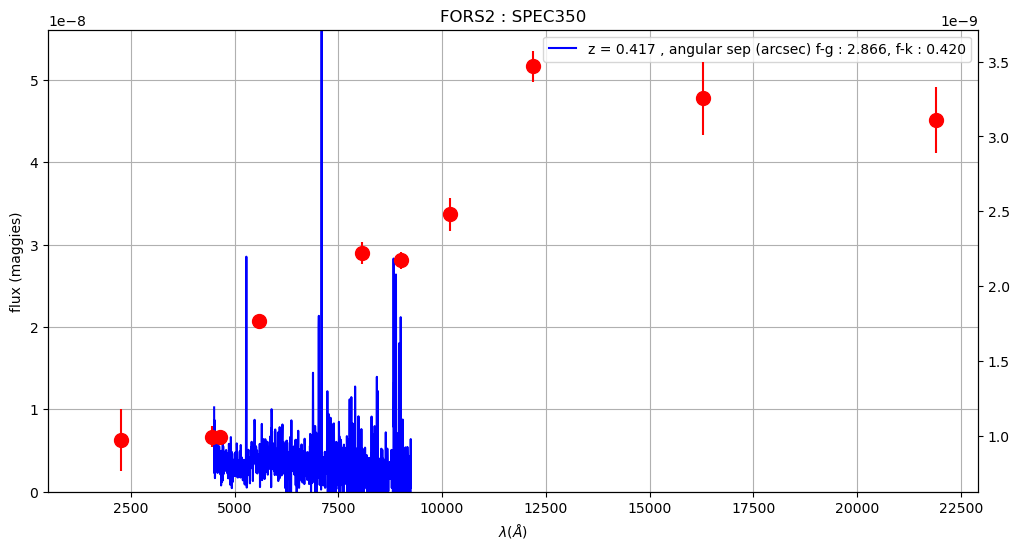

205  ==  363
b'H9,H8,H,H{delta},[OIII],H{alpha}                                            \r'


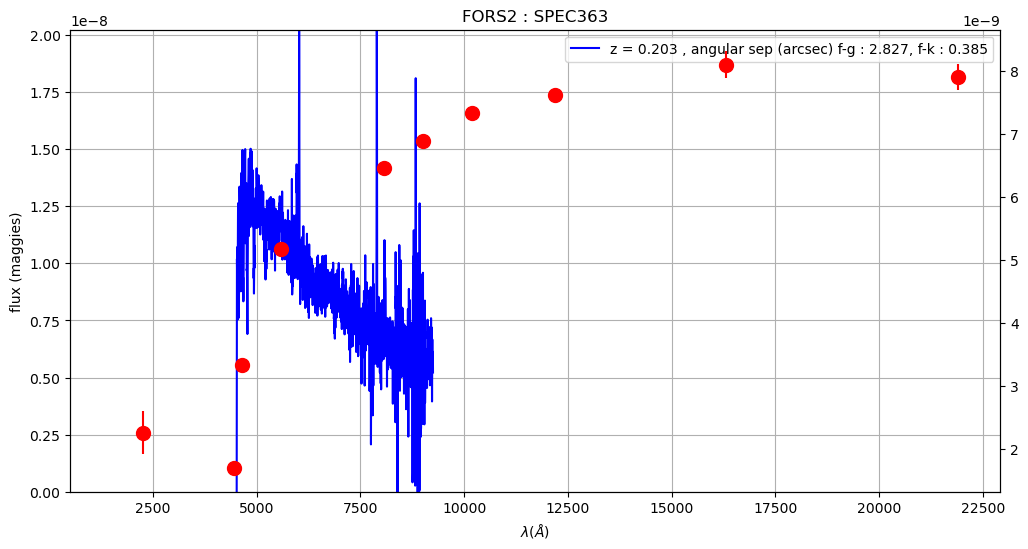

210  ==  368
b'[OII],H{delta},H{beta},[OIII]                                               \r'


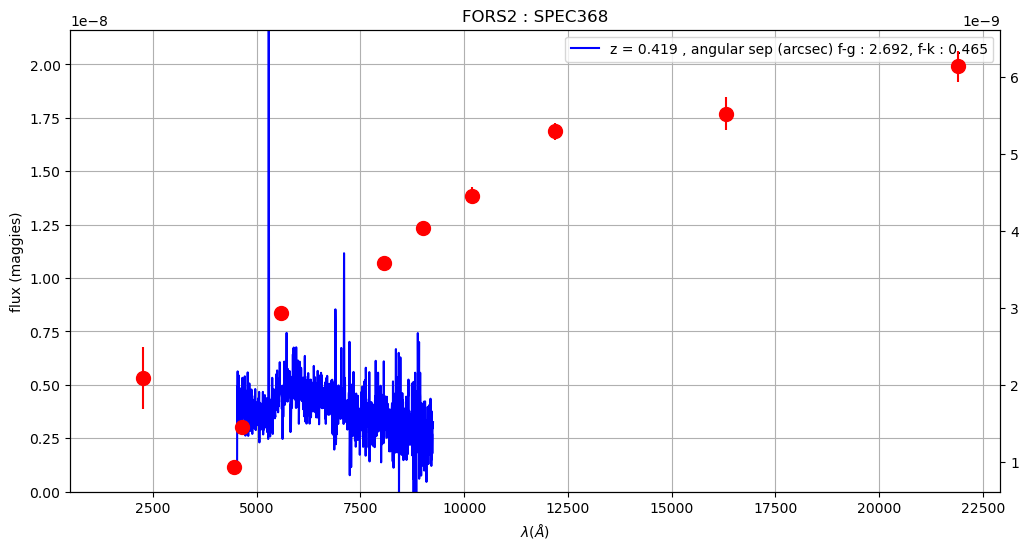

215  ==  373
b'[OII],H9,K,H,H{beta},[OIII],H{alpha}                                        \r'


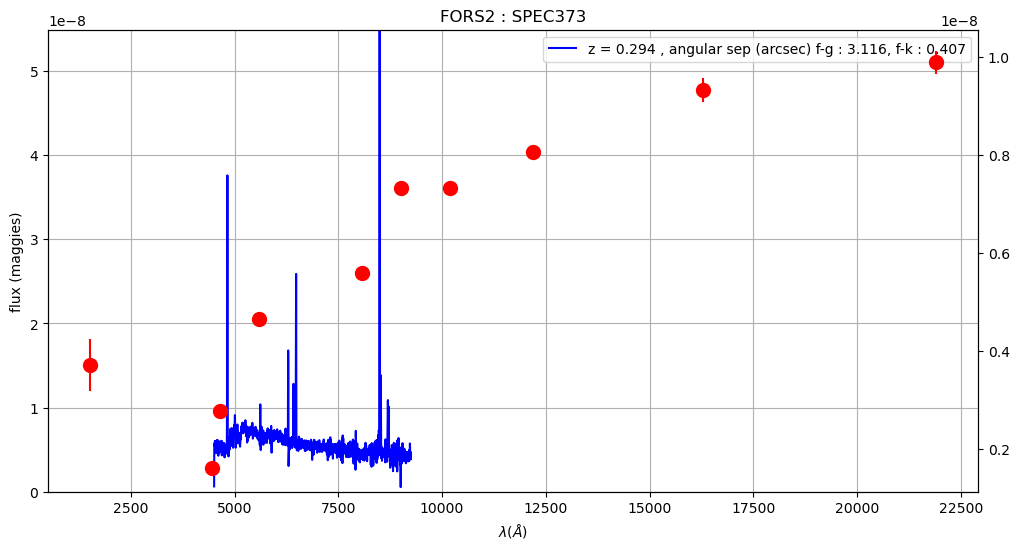

228  ==  386
b'[OII],H,H{delta}                                                            \r'


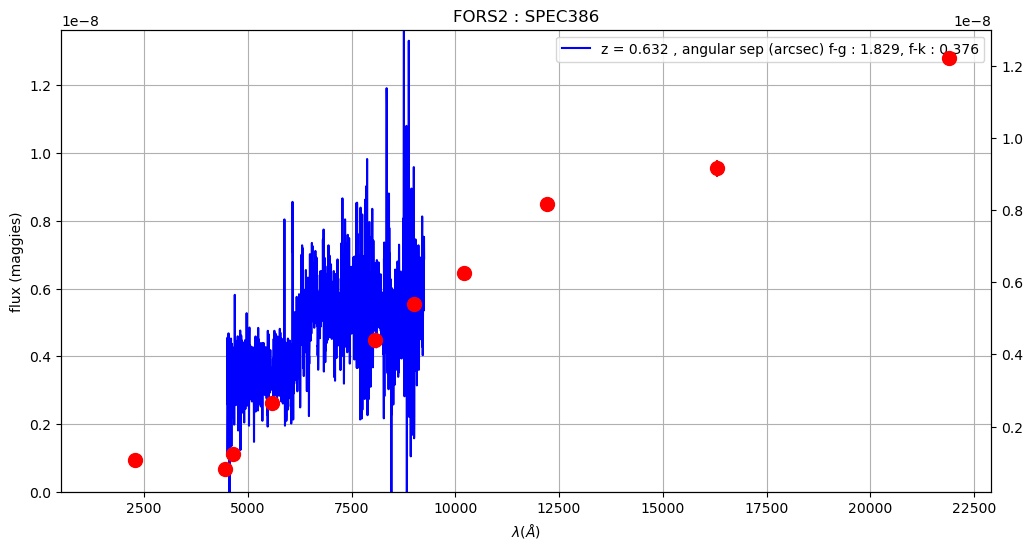

232  ==  390
b'[OII],H,H{beta},[OIII]                                                      \r'


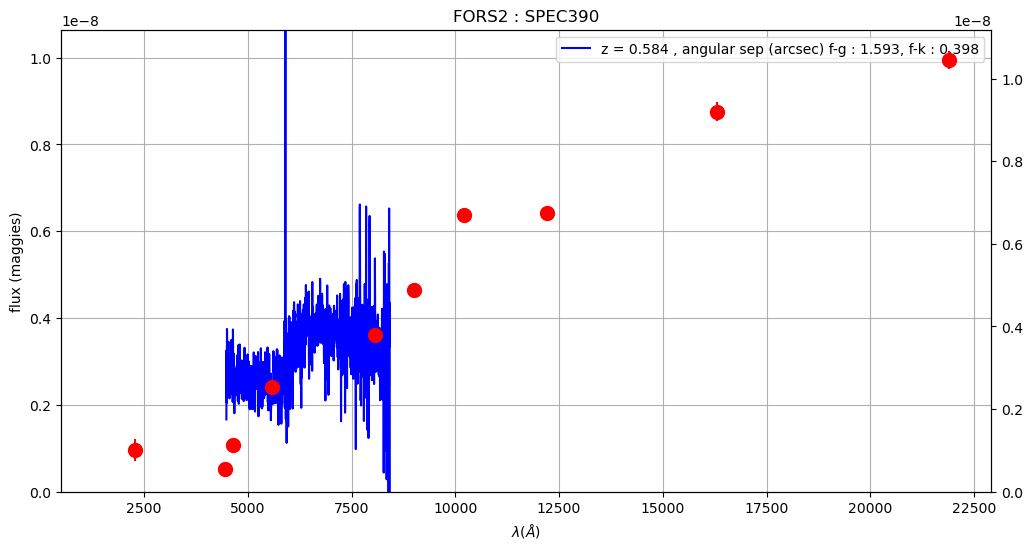

241  ==  399
b'[OII],H{gamma},H{beta},[OIII],H{alpha}                                      \r'


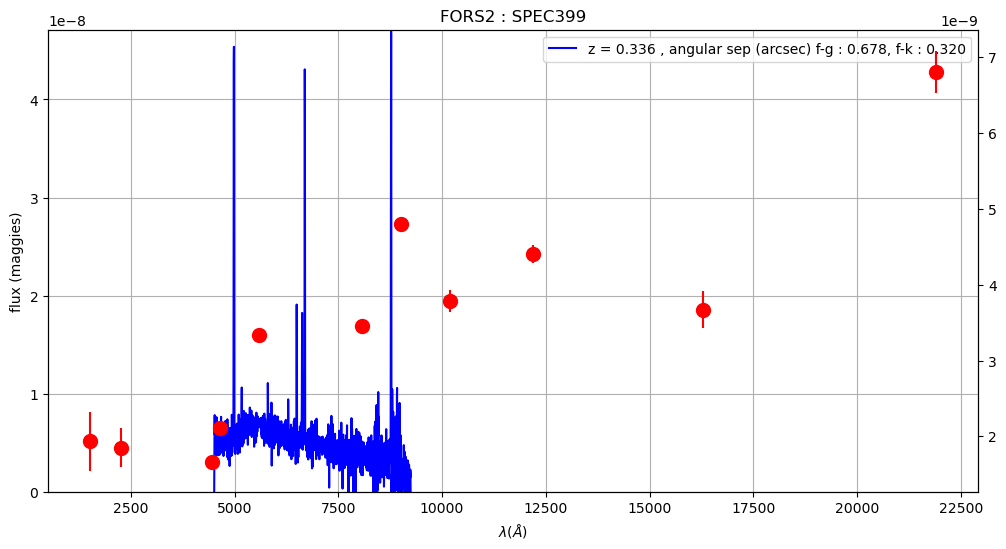

243  ==  401
b'[OII],H,H{beta}                                                             \r'


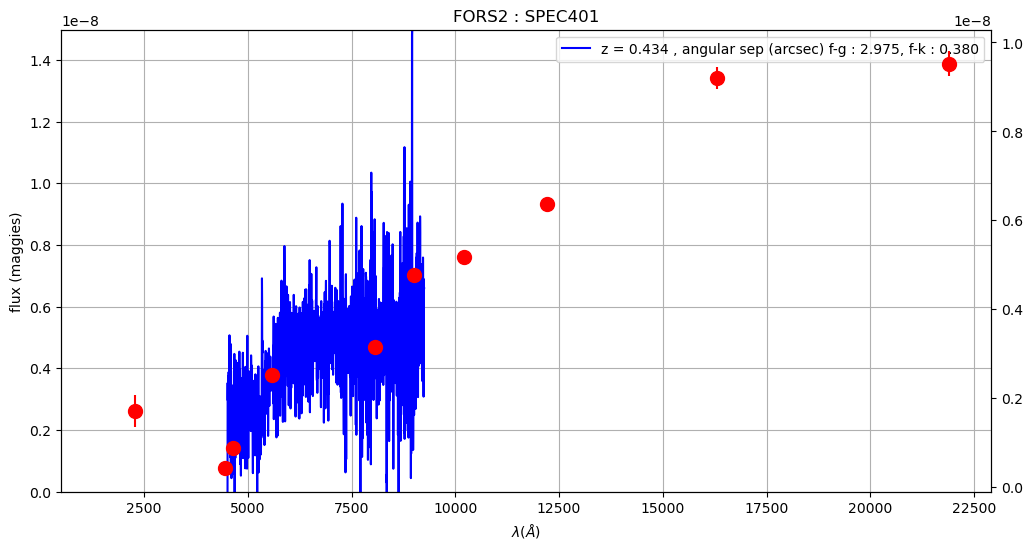

244  ==  402
b'[OII],H9,K,H,H{delta}                                                       \r'


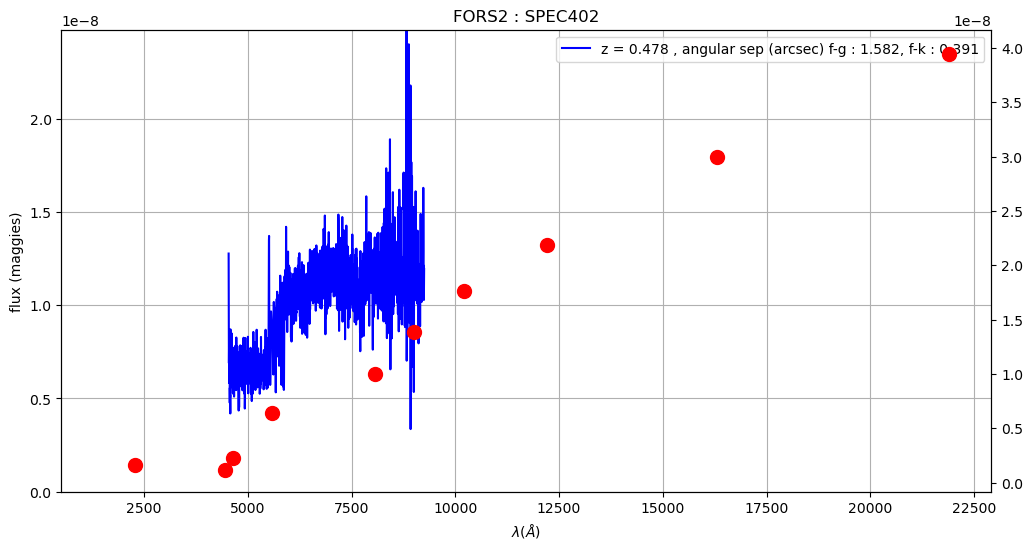

245  ==  403
b'[OII],H,H{alpha}                                                            \r'


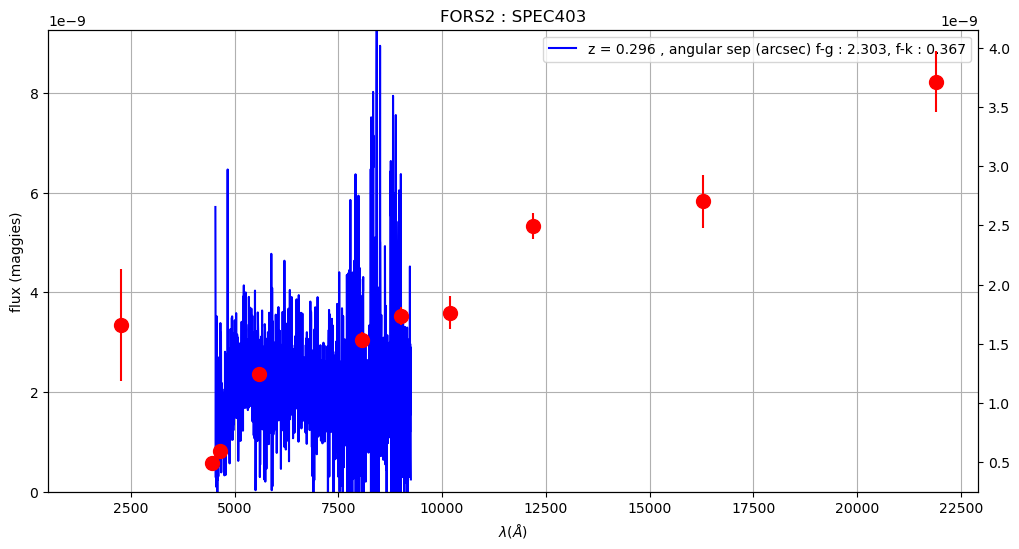

253  ==  411
b'[OII],H8,K,H,H{delta}                                                       \r'


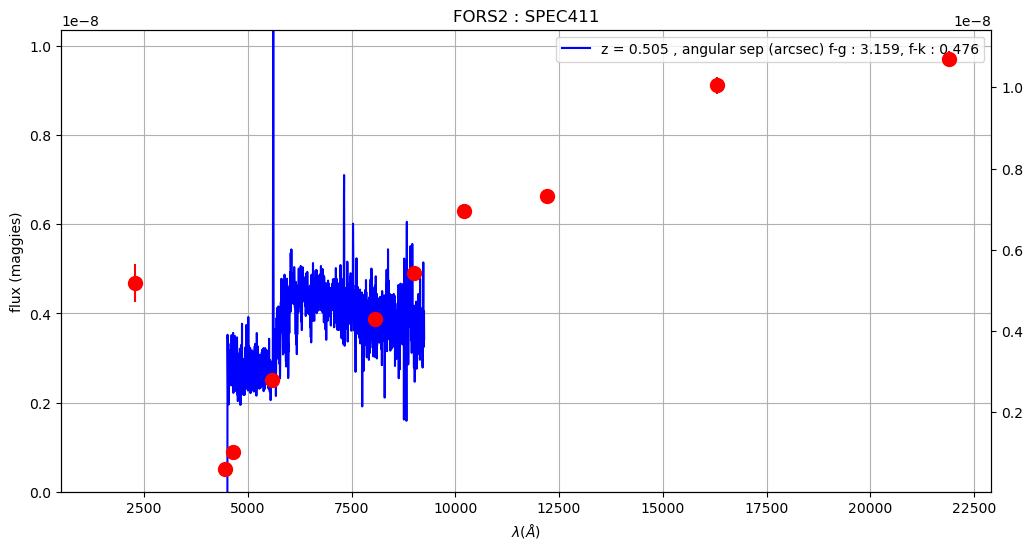

256  ==  414
b'MgII,[OII],H10,H9,H8,H,H{delta}                                             \r'


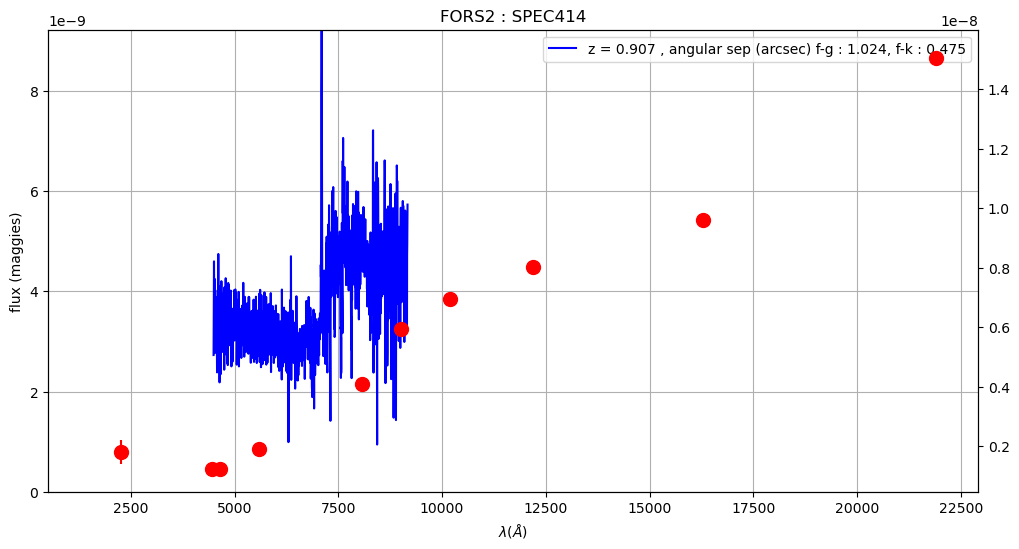

257  ==  415
b'[OIII],H{alpha}                                                             \r'


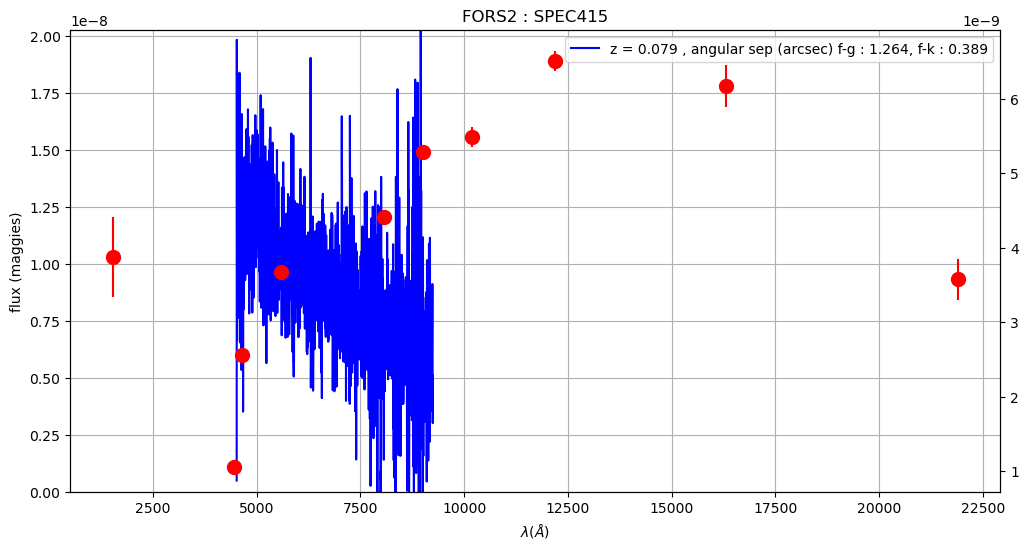

263  ==  421
b'H{beta},[OIII],H{alpha}                                                     \r'


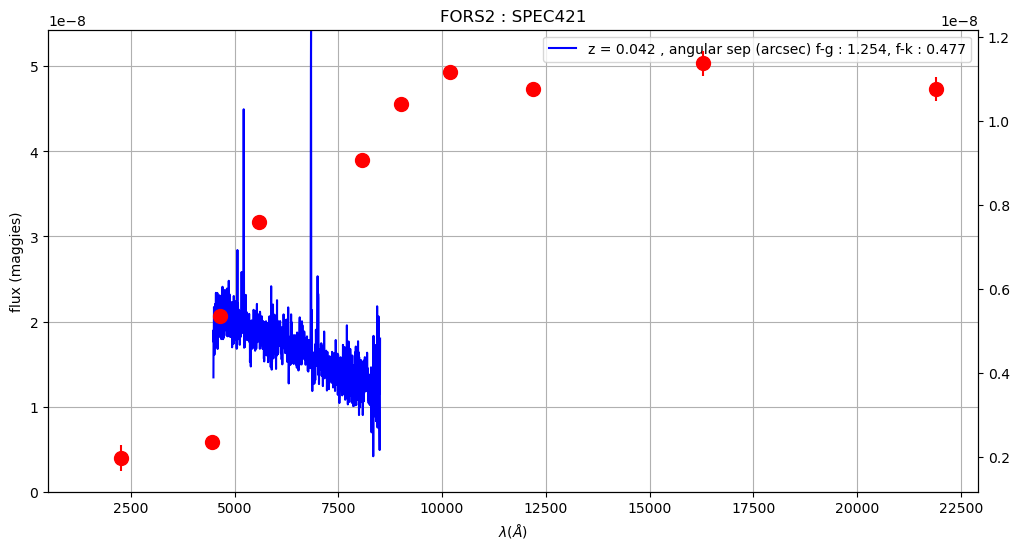

275  ==  434
b'[OII],H{beta},[OIII],H{alpha}                                               \r'


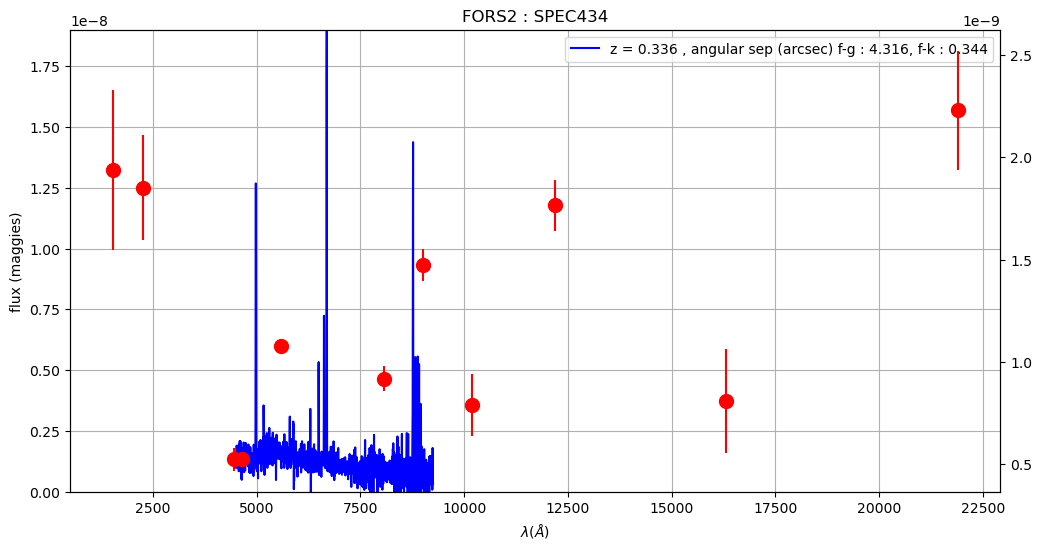

276  ==  435
b'[OII],K,H,H{beta},[OIII],H{alpha}                                           \r'


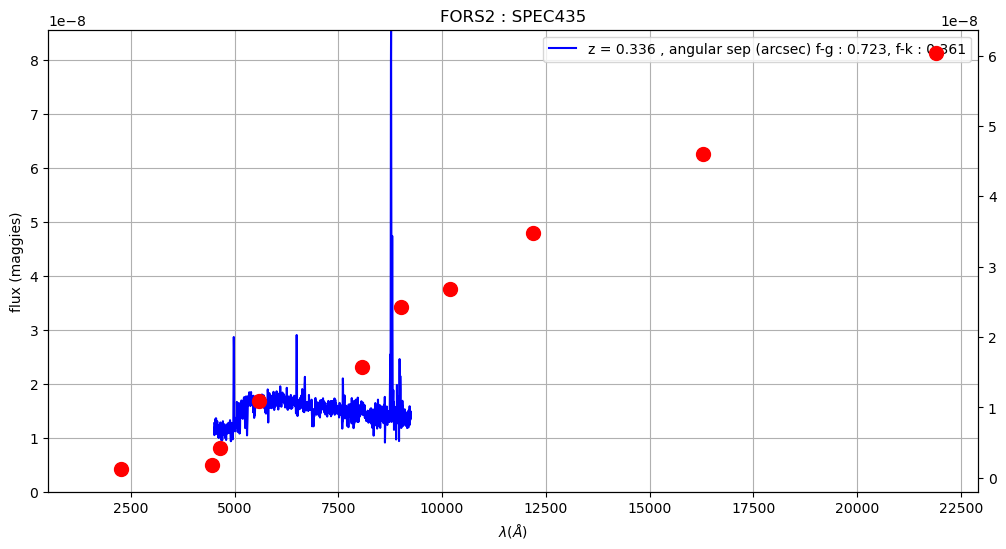

278  ==  437
b'[OII],H{beta},[OIII],H{alpha}                                               \r'


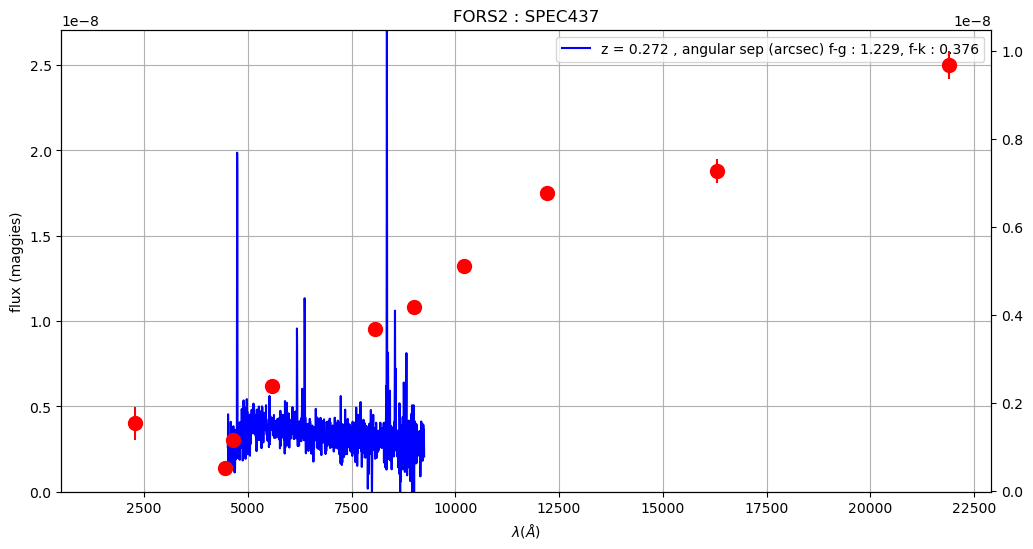

285  ==  444
b'[OII],K,H,H{beta}                                                           \r'


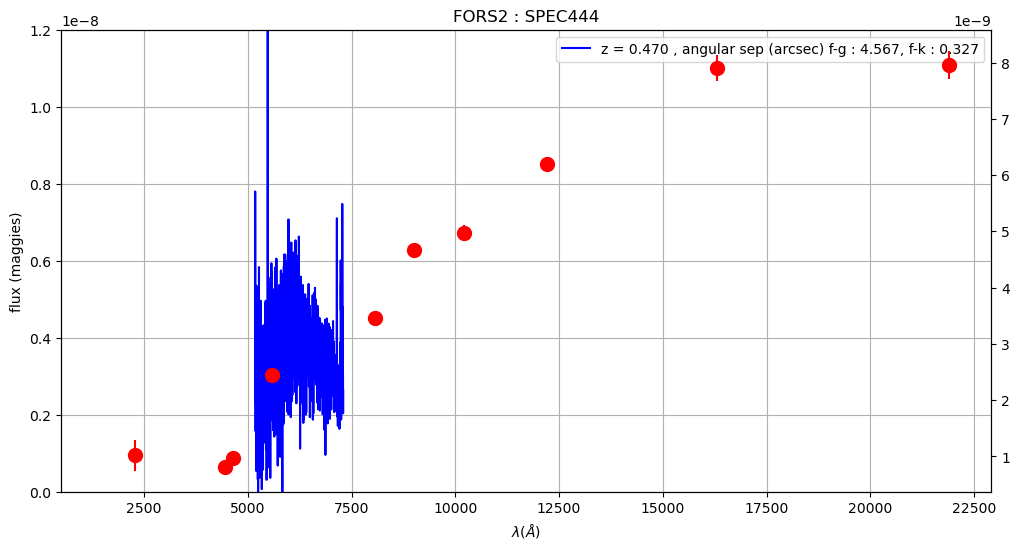

292  ==  451
b'K,H,4000{AA}-break,H{delta}                                                 \r'


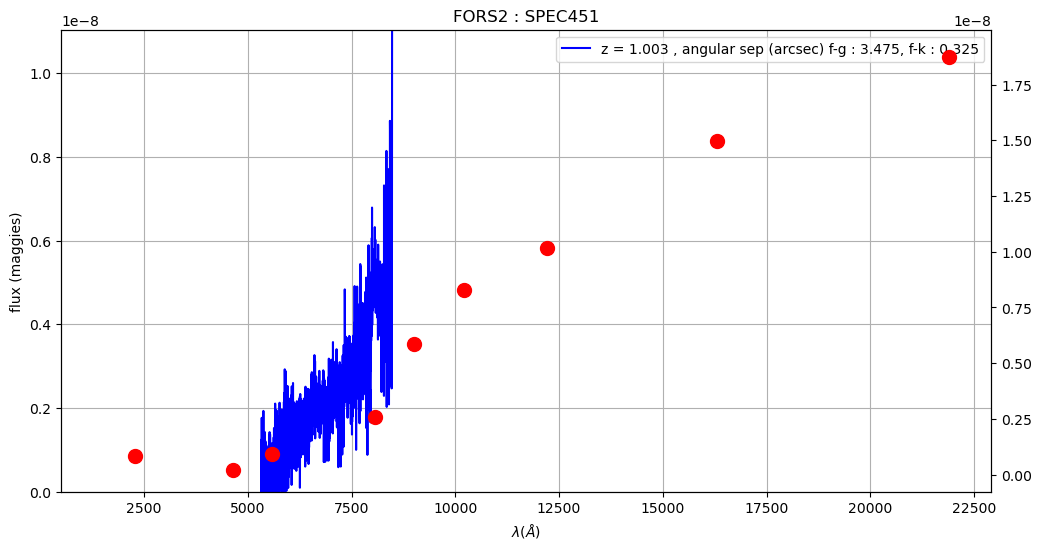

312  ==  471
b'[OII],H{beta},[OIII]                                                        \r'


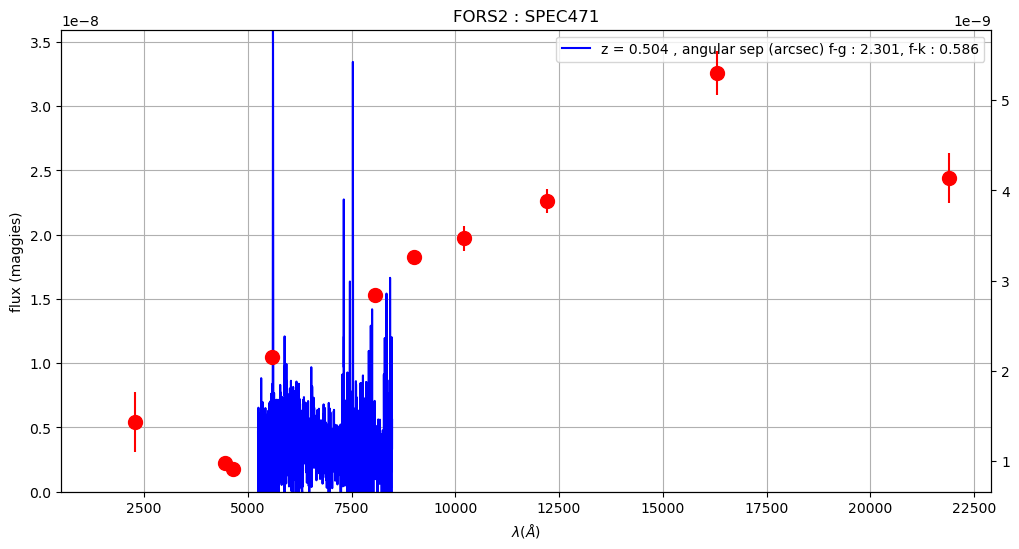

313  ==  472
b'[OII],H{beta},[OIII]                                                        \r'


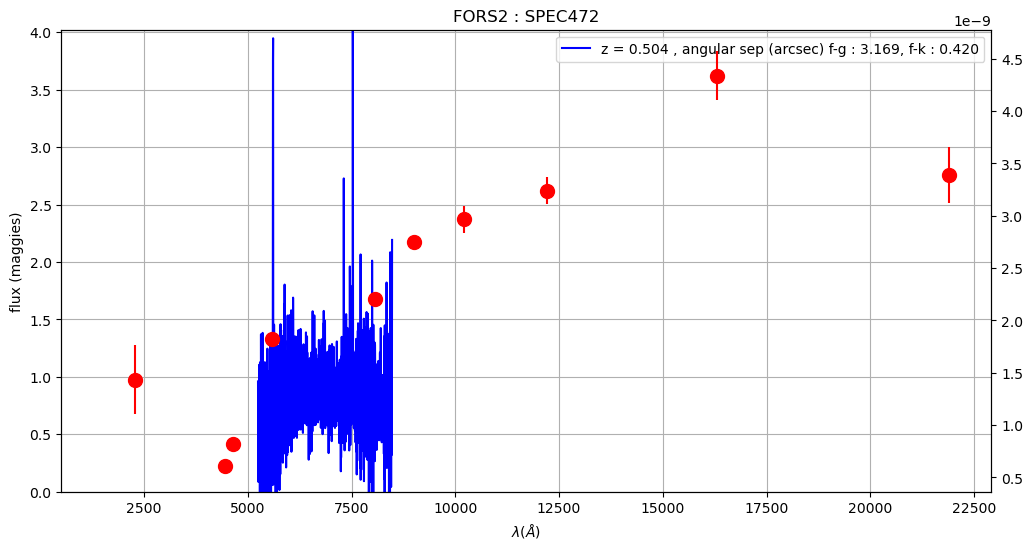

316  ==  476
b'[OIII],H{alpha}                                                             \r'


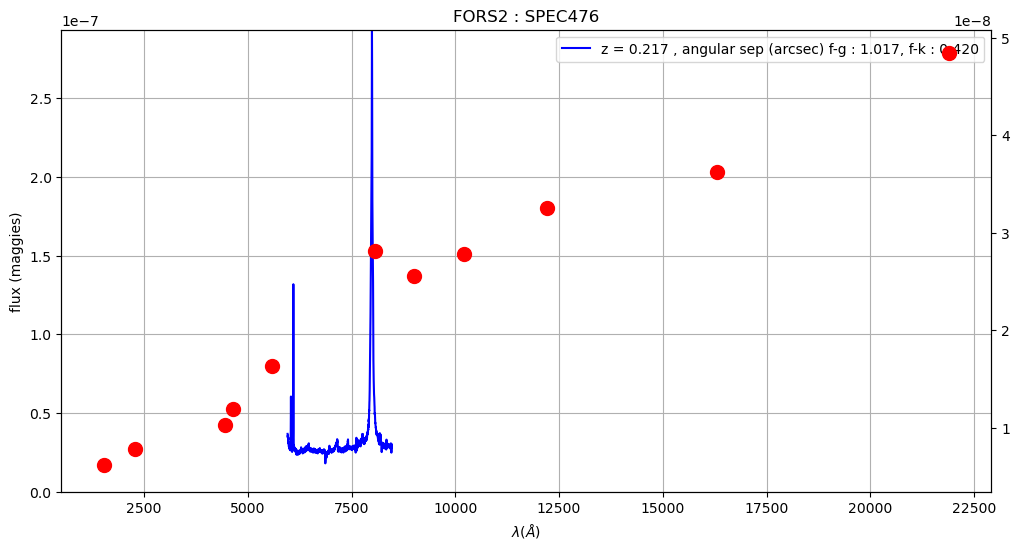

331  ==  499
b'[OII],H{beta},[OIII]                                                        \r'


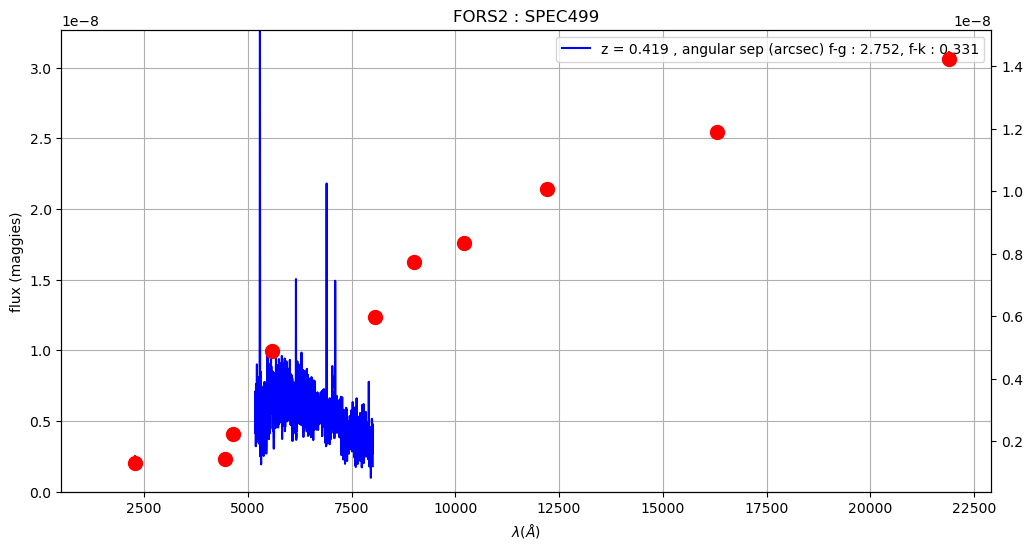

345  ==  516
b'                                                                            \r'


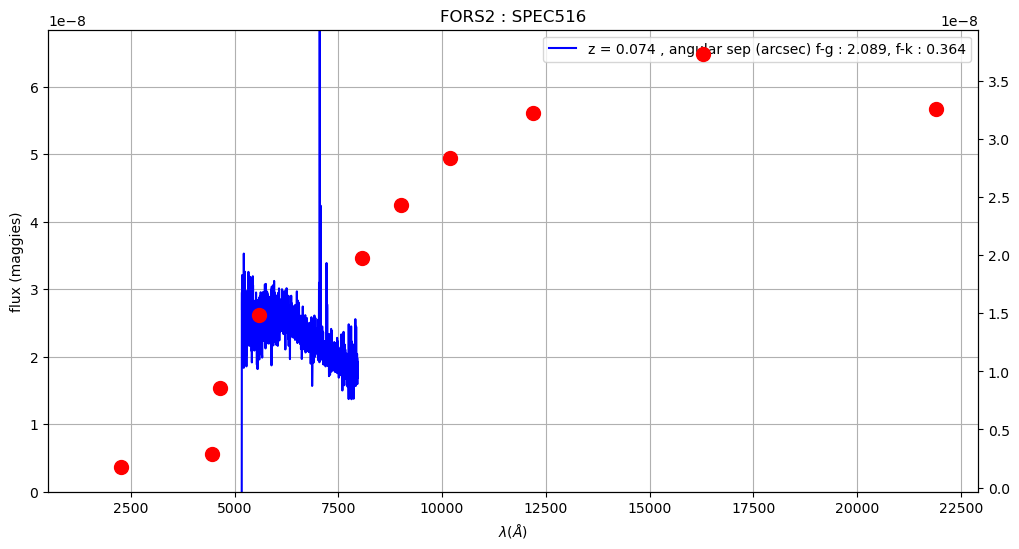

348  ==  519
b'K,H,G,Fe43,Fe45,H{beta},Mgb                                                 \r'


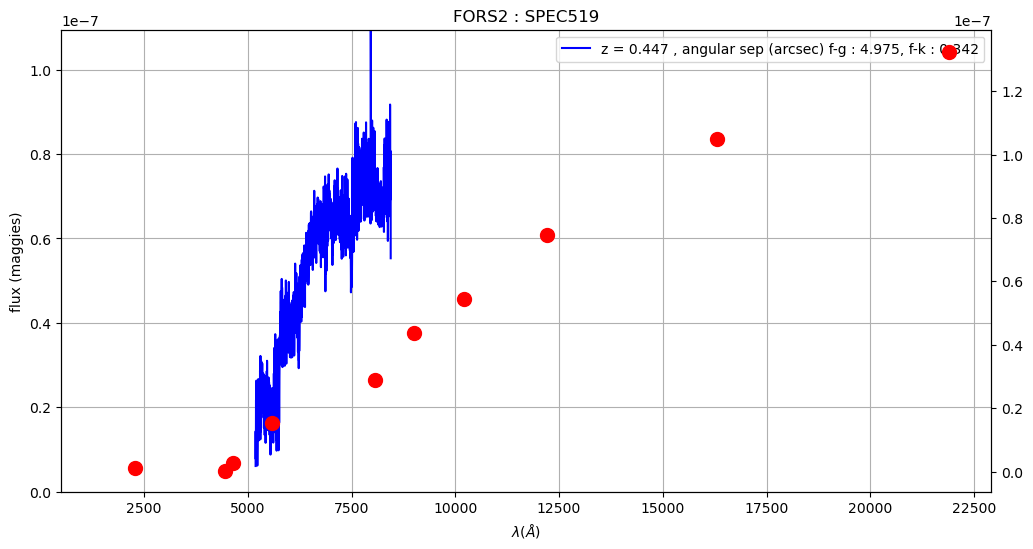

382  ==  558
b'[OII],H9,K,H,H{beta},[OIII]                                                 \r'


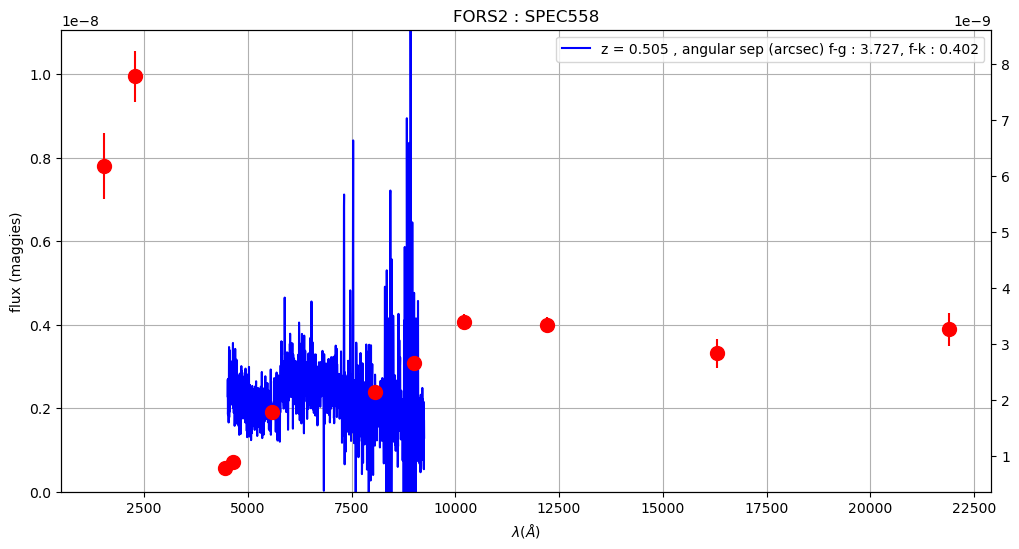

384  ==  560
b'G,H{beta},Mgb,NaD                                                           \r'


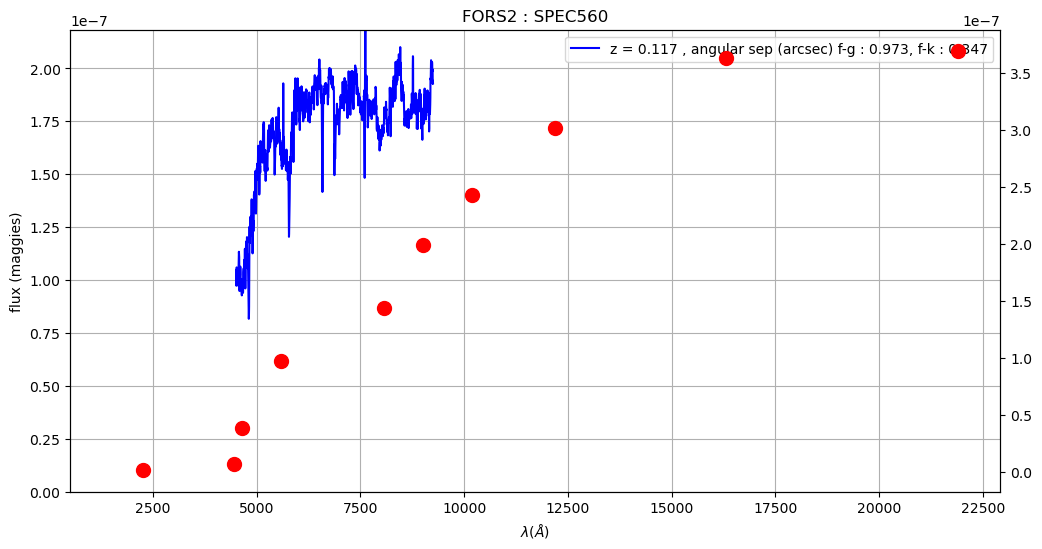

386  ==  563
b'H{delta},G,Mgb,NaD,H{alpha}                                                 \r'


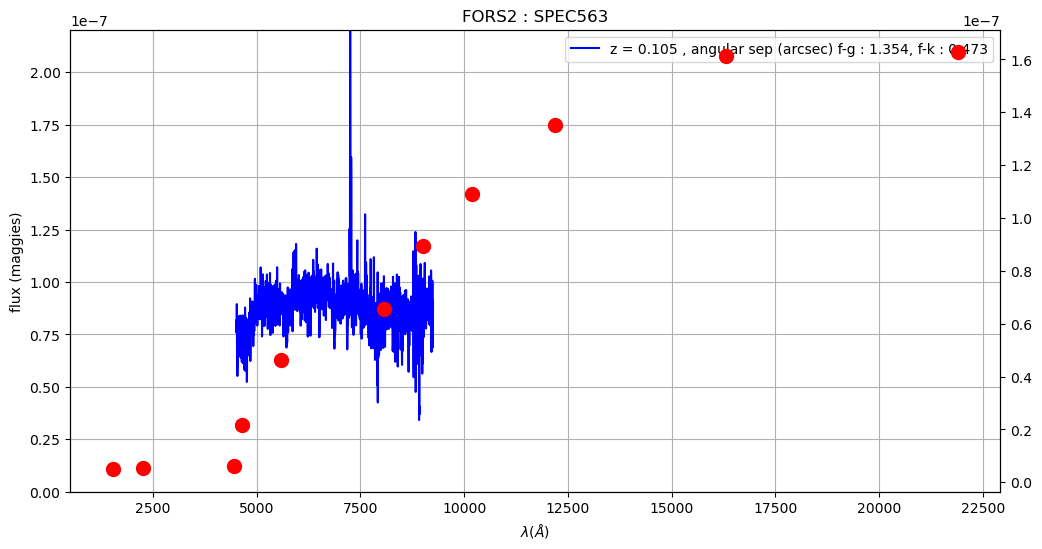

387  ==  564
b'[OII],H{delta},H{gamma},H{beta},[OIII],H{alpha}                             \r'


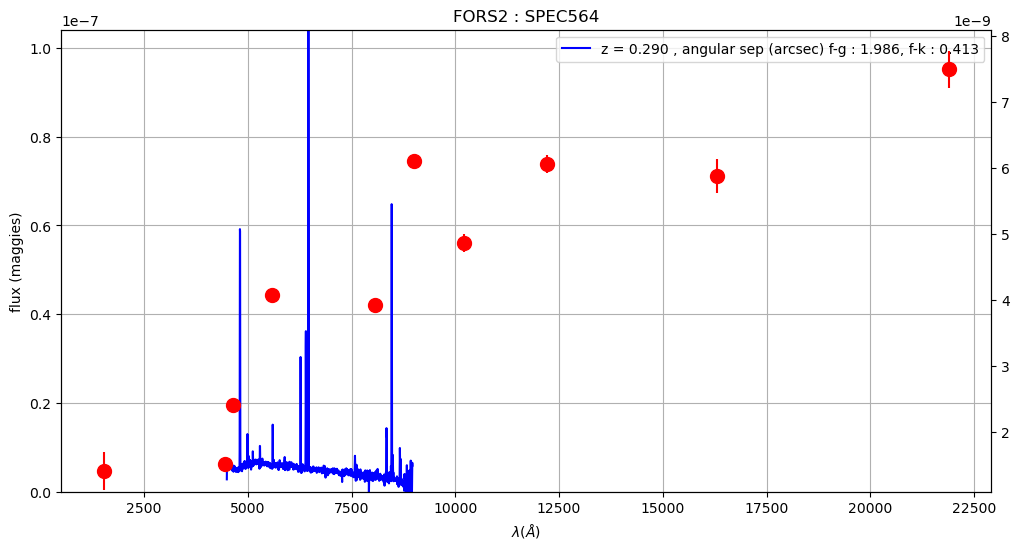

395  ==  572
b'[OII],H10,H9,H8,K,H,H{beta},[OIII],H{alpha}                                 \r'


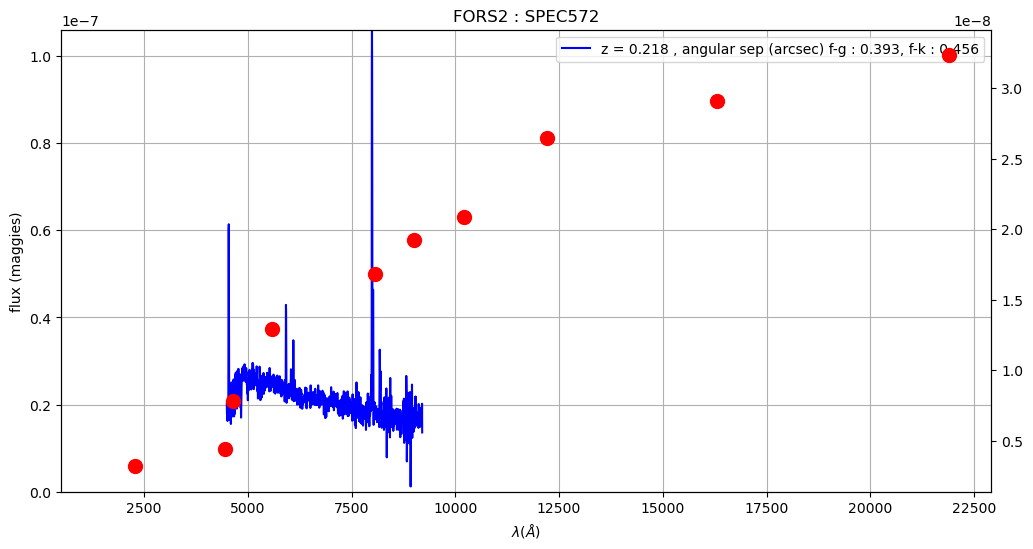

409  ==  587
b'[OII],H9,H,H{beta},[OIII]                                                   \r'


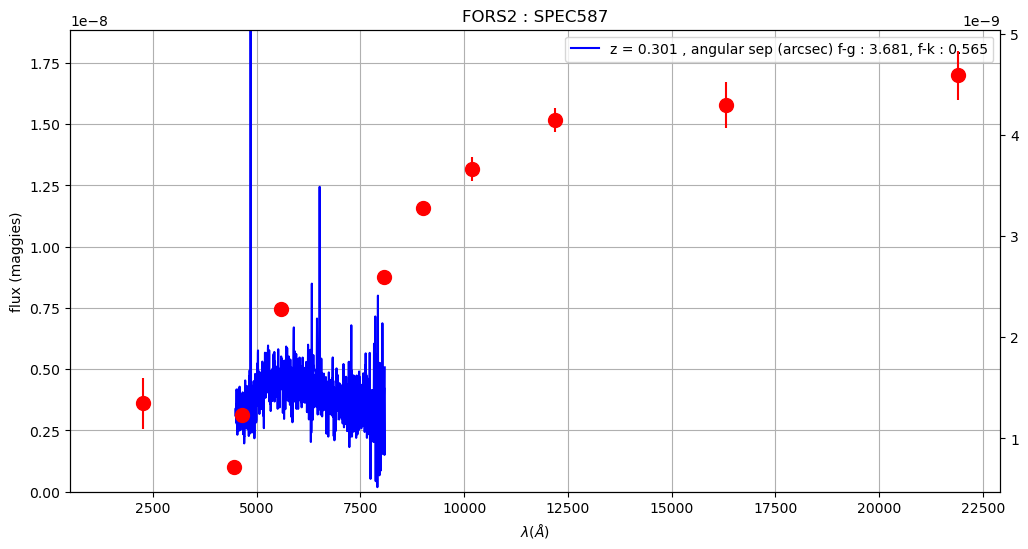

411  ==  589
b'[OII],H9,H,H{delta}                                                         \r'


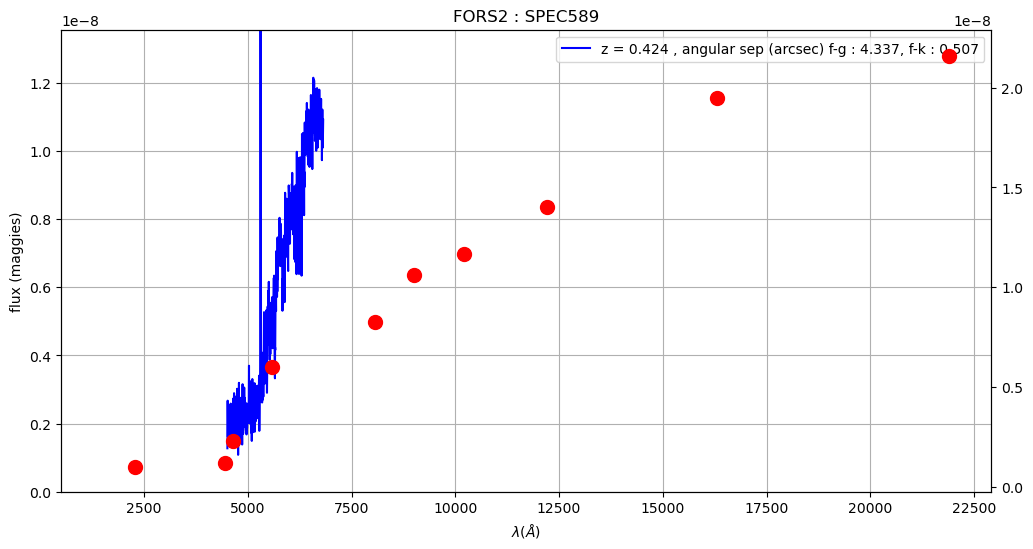

413  ==  591
b'broad,MgII,[OII],(QSO)                                                      \r'


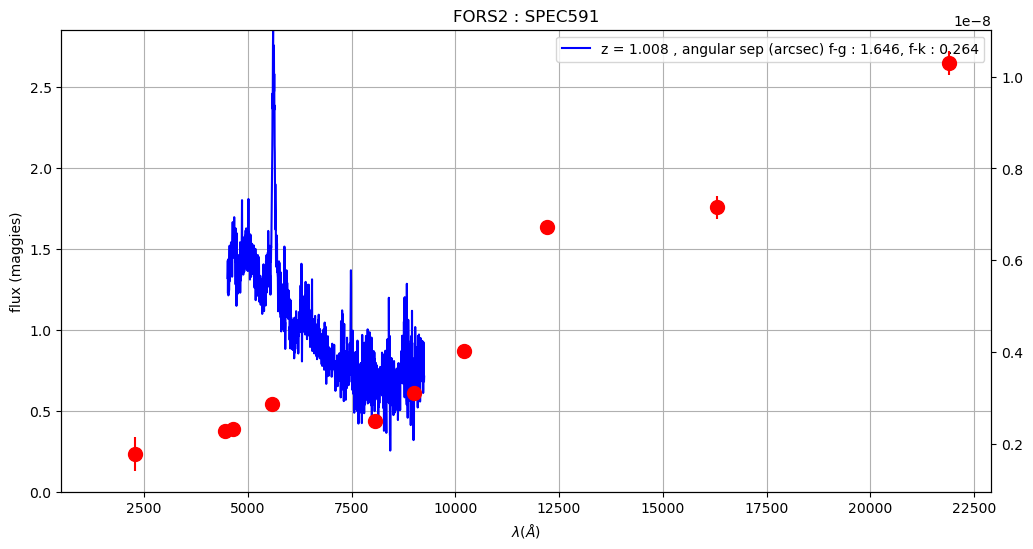

416  ==  595
b'[OII],H11,H10,H9,H8,K,H,H{delta},H{beta},[OIII]                             \r'


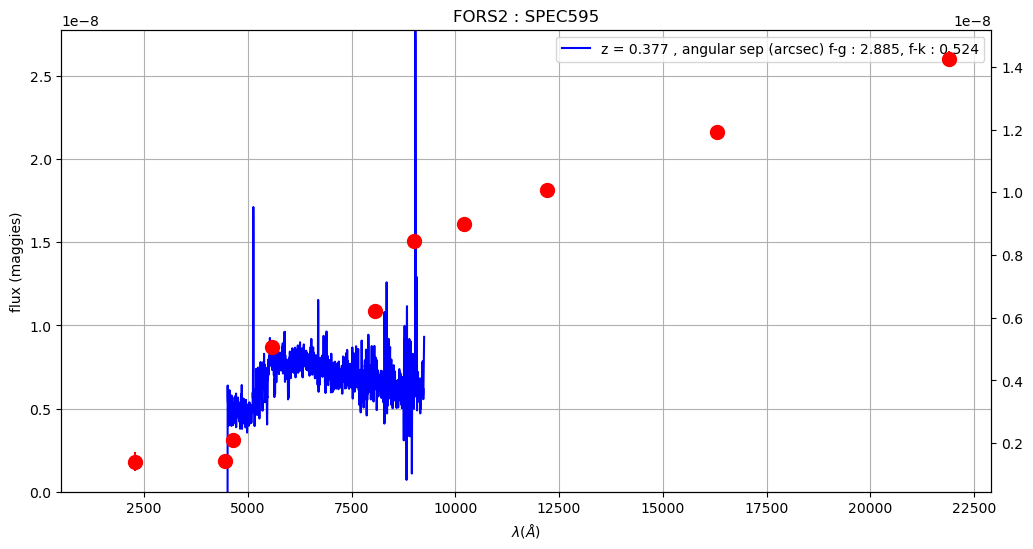

425  ==  604
b'H{beta},[OIII],H{alpha}                                                     \r'


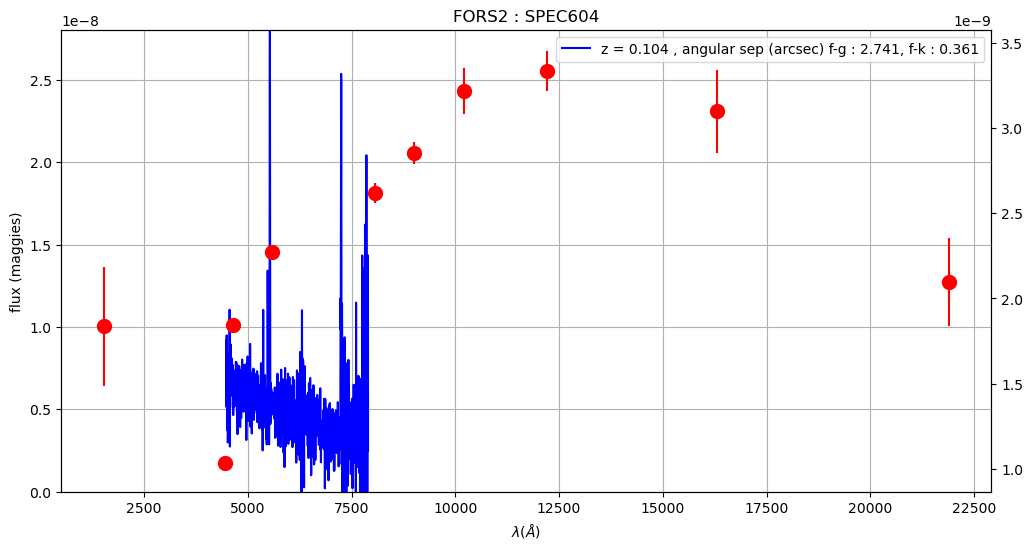

428  ==  608
b'weak,[OII],K,H,4000{AA}-break                                               \r'


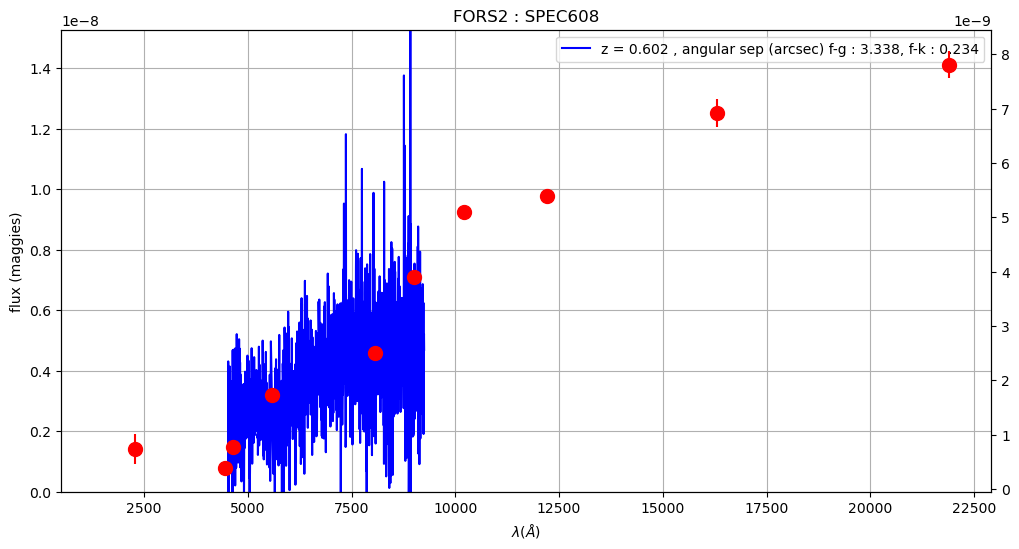

431  ==  611
b'[OII],H8,K,H,H{delta}                                                       \r'


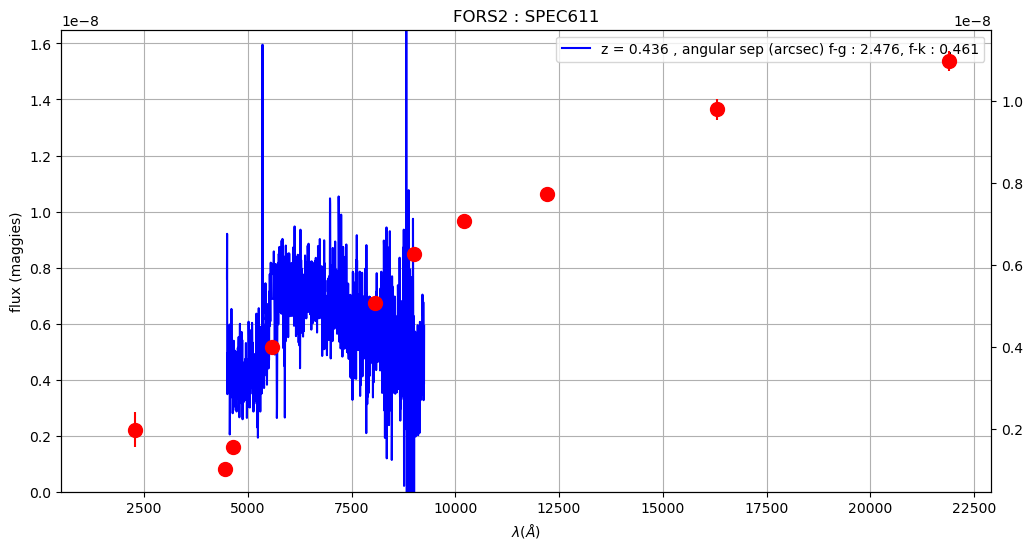

442  ==  626
b'[OII],H8,K,H                                                                \r'


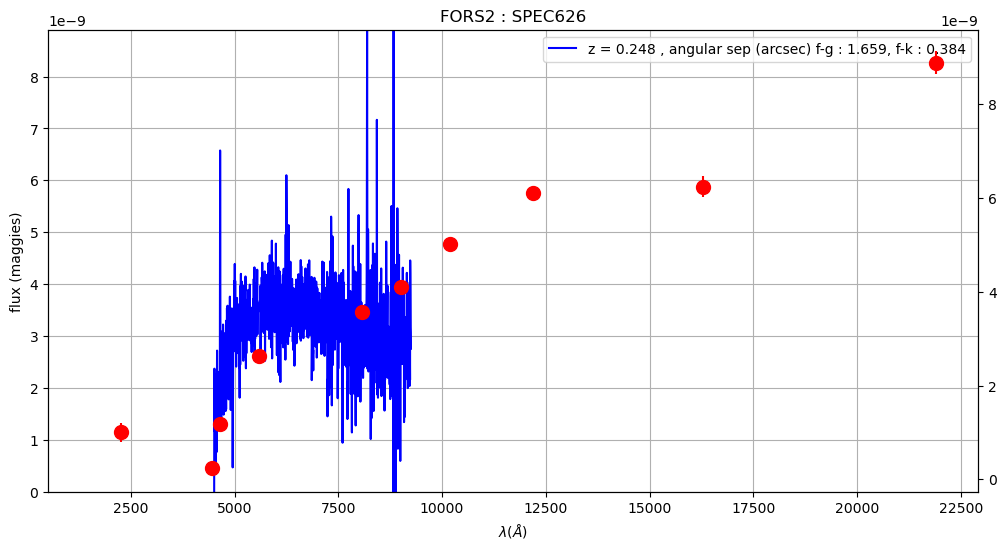

458  ==  642
b'[OII],H10,H{gamma},H{beta},[OIII]                                           \r'


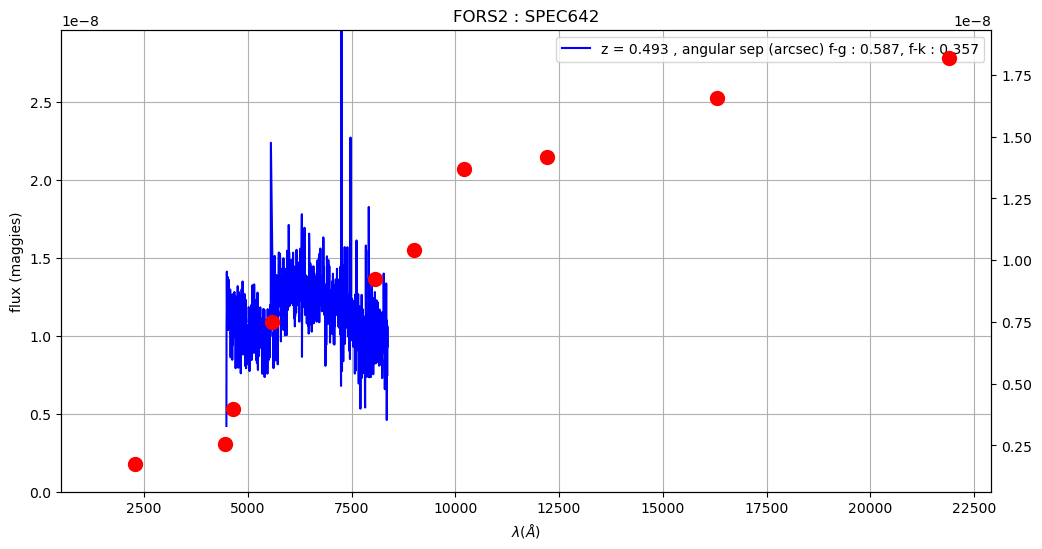

459  ==  643
b'H8,K,H,4000{AA}-break                                                       \r'


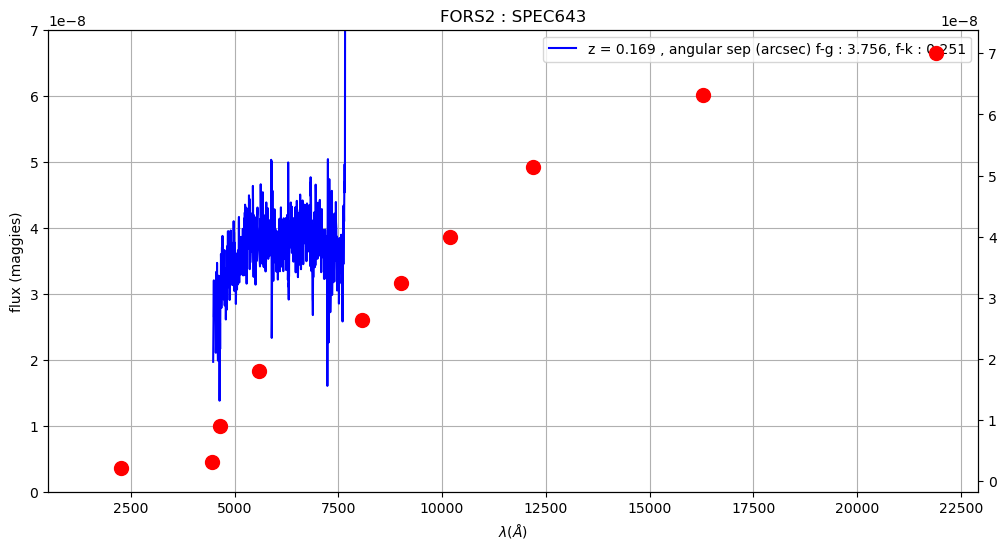

461  ==  645
b'H{beta},[OIII],H{alpha}                                                     \r'


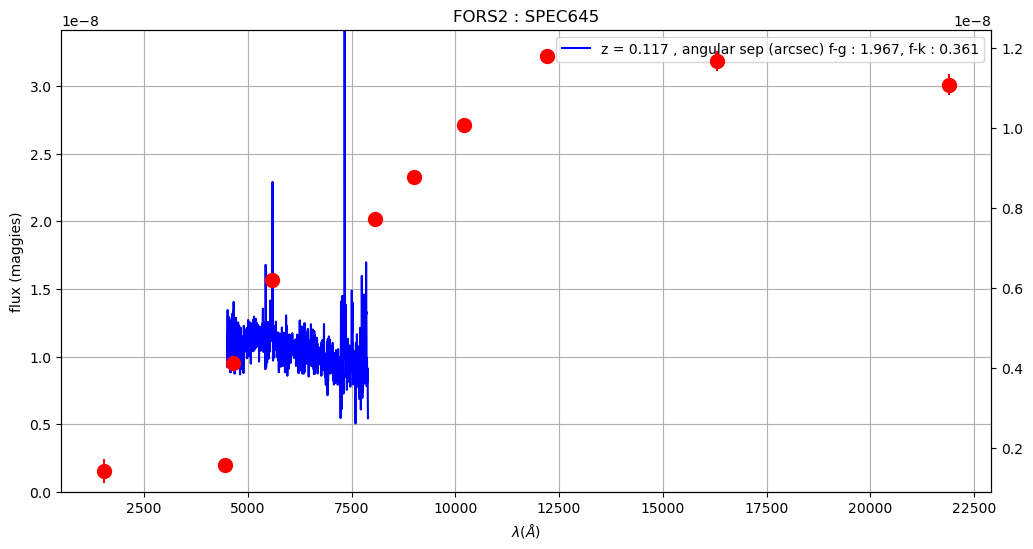

463  ==  647
b'H{beta},[OIII],H{alpha}                                                     \r'


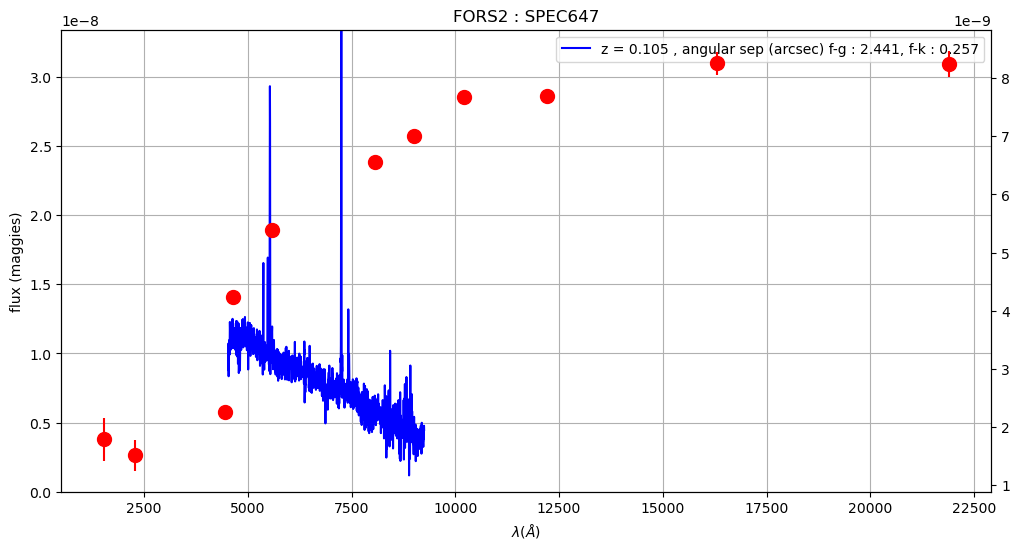

469  ==  653
b'[OII],H9,H8,K,H,H{beta},H{alpha}                                            \r'


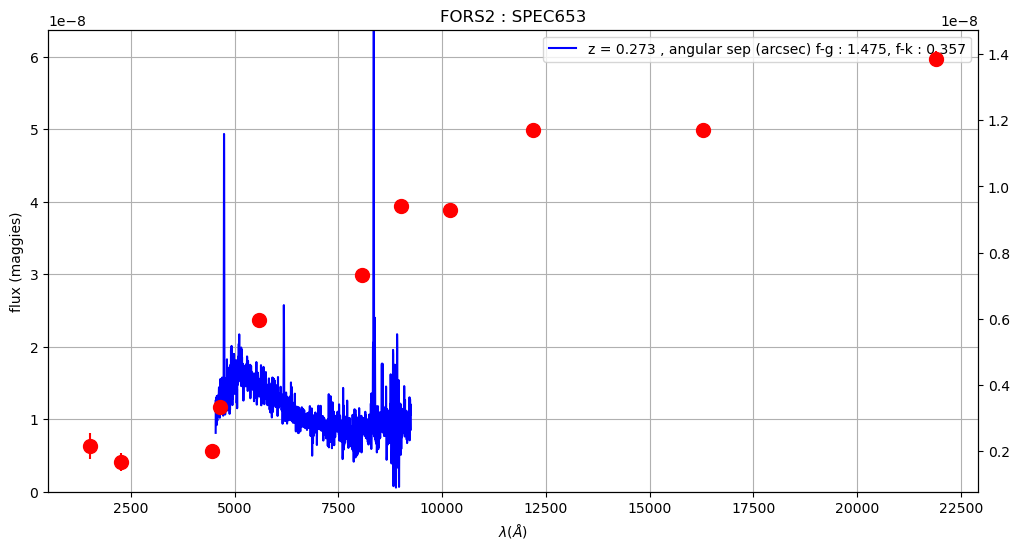

473  ==  657
b'H{beta},[OIII],H{alpha}                                                     \r'


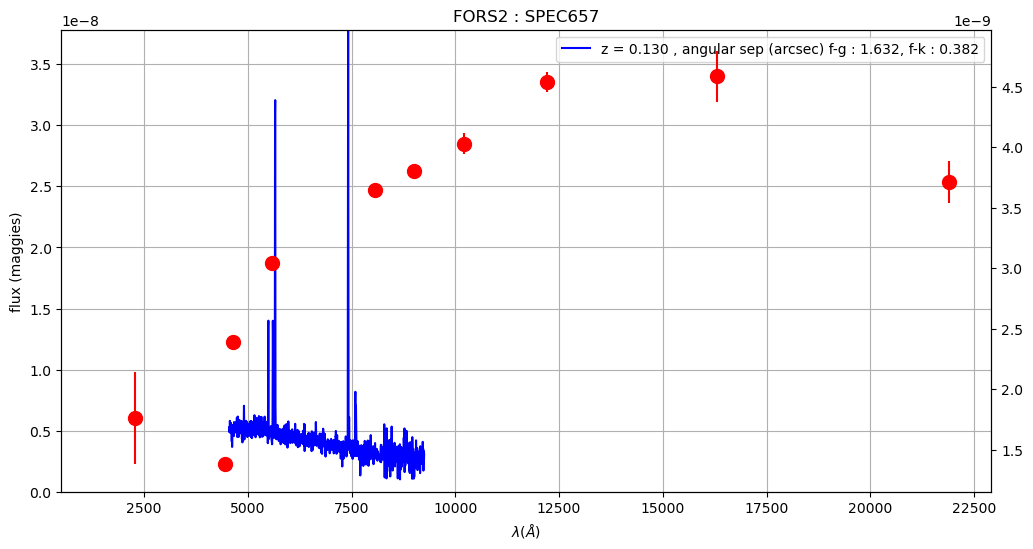

480  ==  664
b'[OII],H8,K,H,H{delta},H{beta},[OIII]                                        \r'


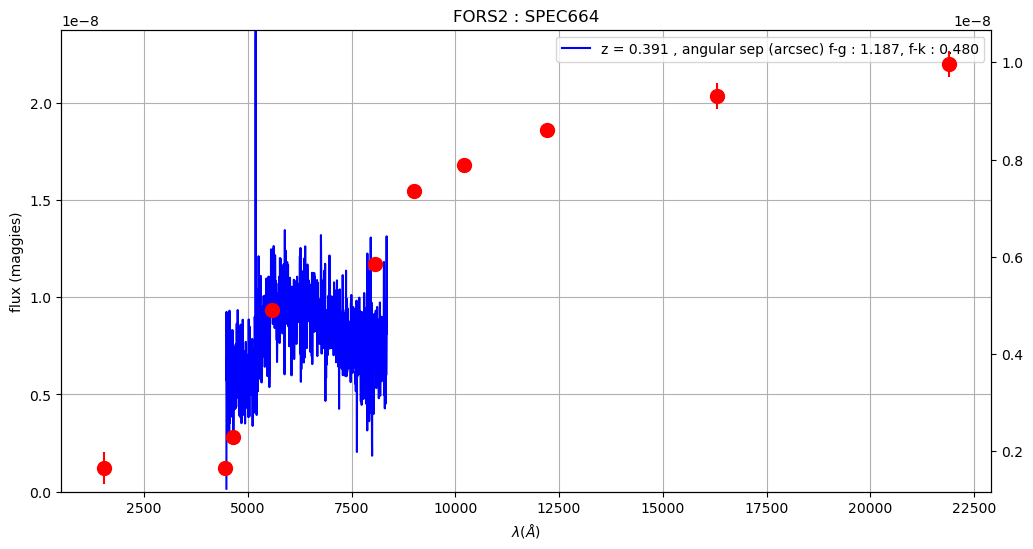

483  ==  669
b'[OII],H9,H8,K,H,H{delta}                                                    \r'


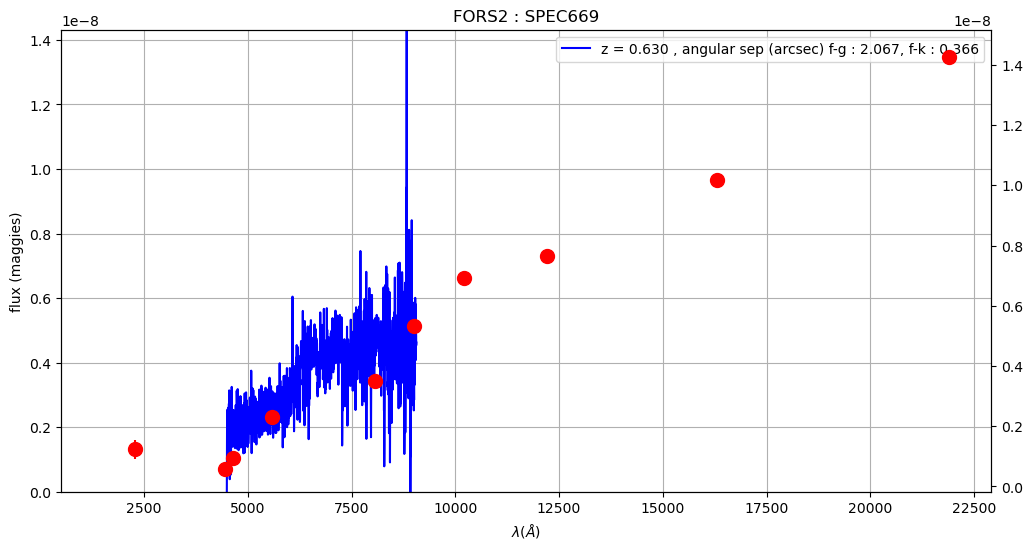

504  ==  691
b'[OIII],H{alpha}                                                             \r'


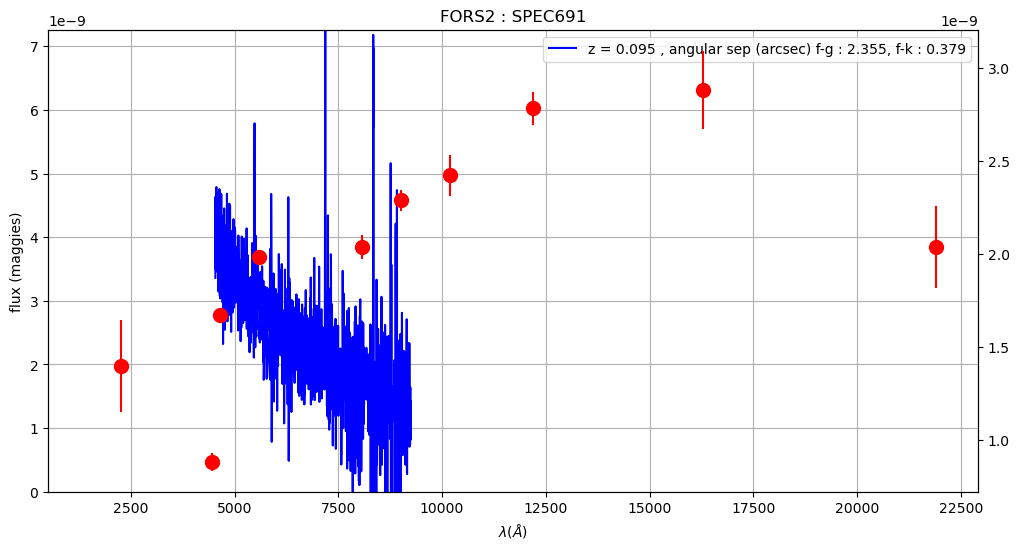

511  ==  698
b'H{beta},[OIII],H{alpha}                                                     \r'


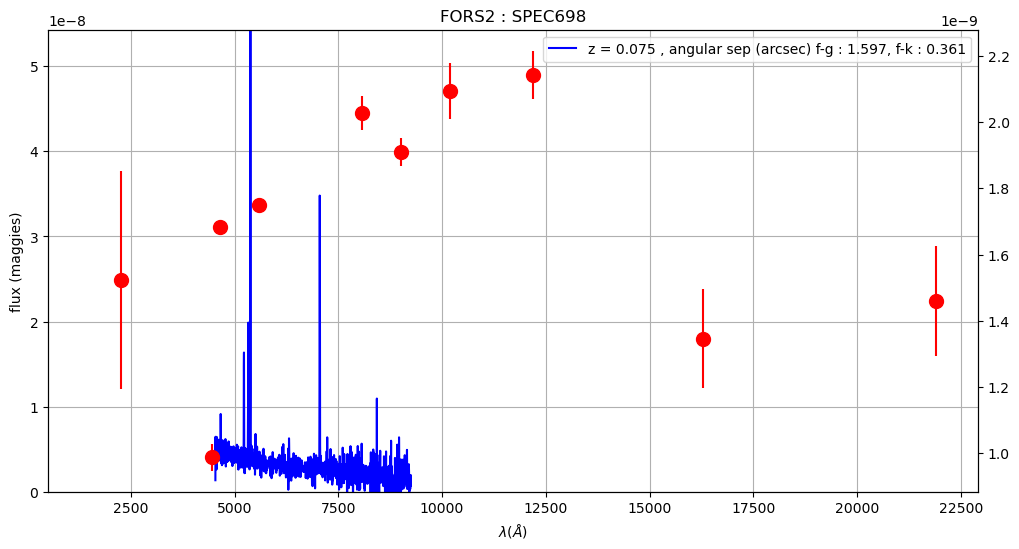

512  ==  699
b'H9,H8,K,H,H{delta},H{beta}                                                  \r'


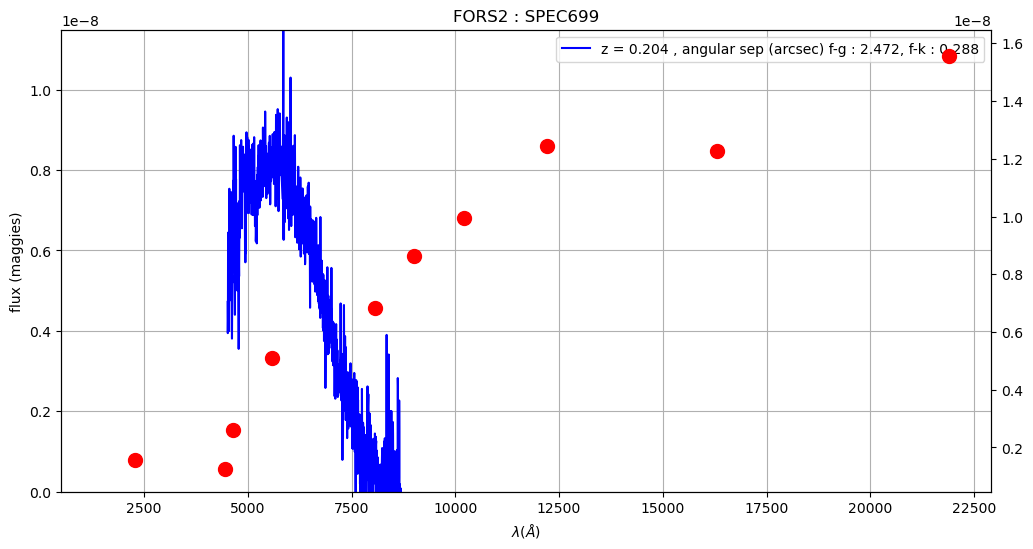

528  ==  717
b'[OII]                                                                       \r'


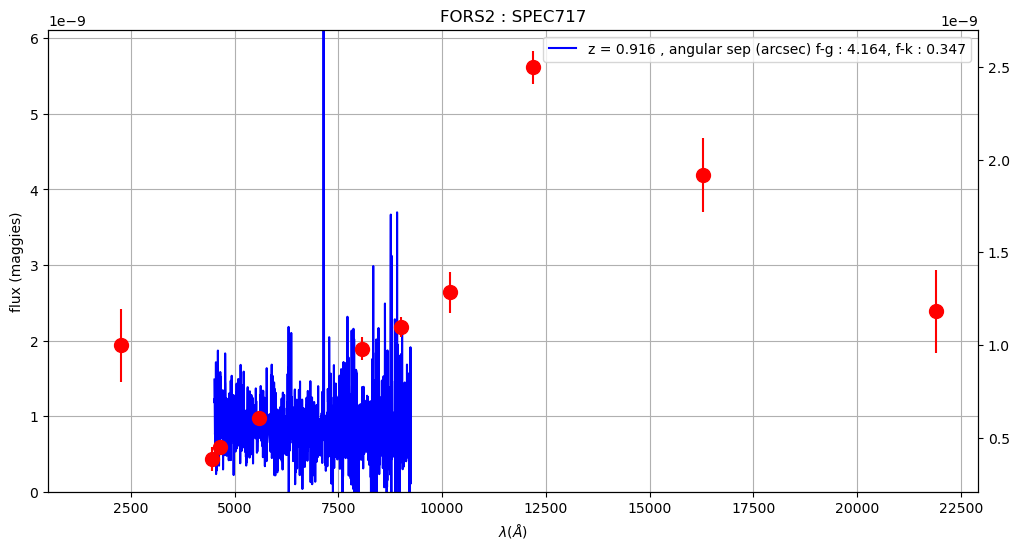

530  ==  719
b'[OII],H11,H10,H9,H8,K,H,H{delta},H{beta},[OIII],H{alpha}                    \r'


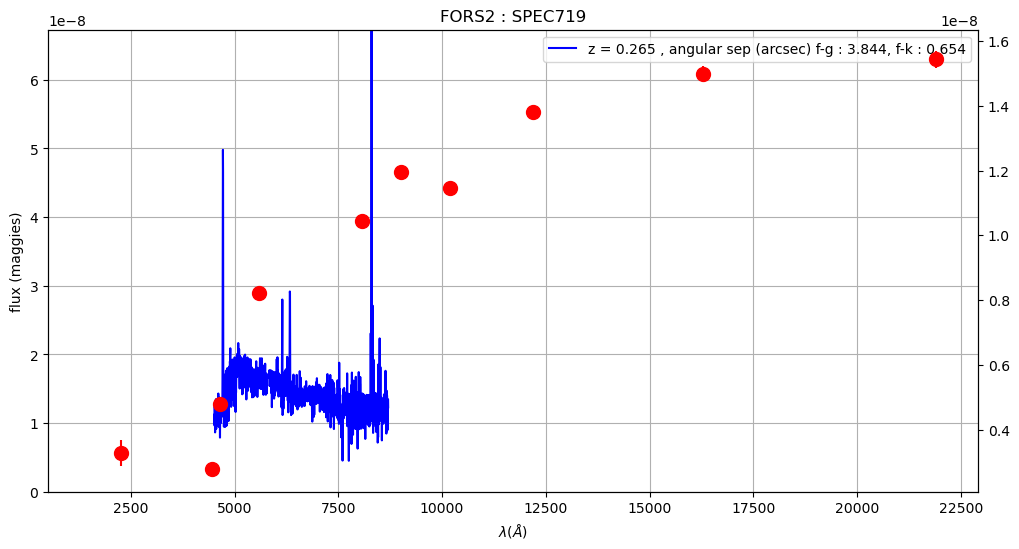

533  ==  722
b'broad,MgII,(QSO)                                                            \r'


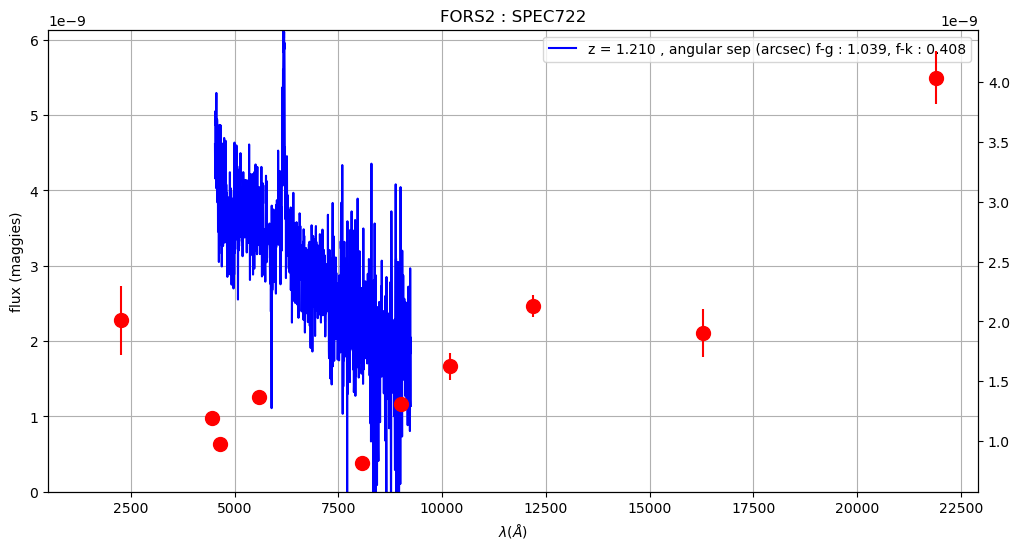

535  ==  724
b'[OII],H8,H,H{beta},[OIII],H{alpha}                                          \r'


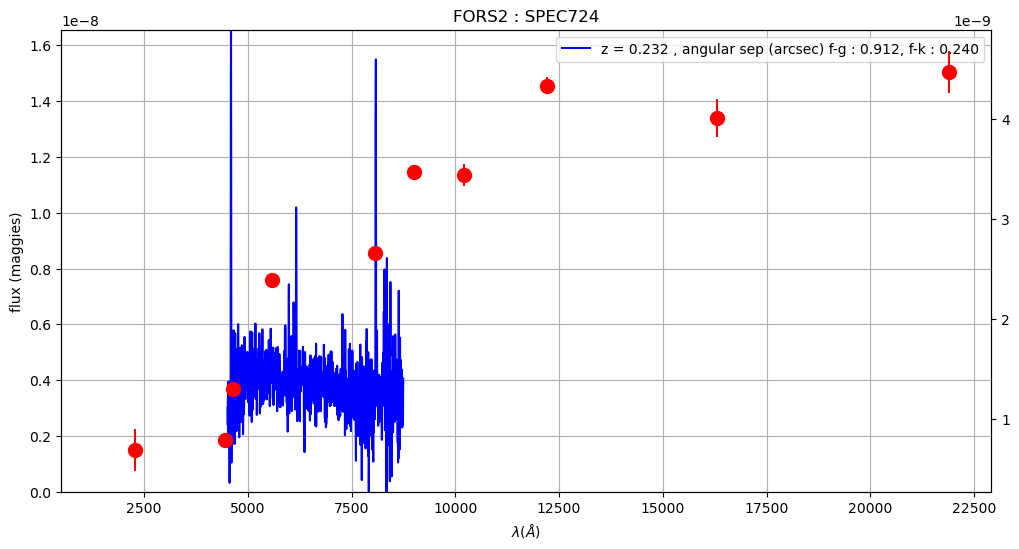

536  ==  725
b'[OII],H{beta},[OIII],H{alpha}                                               \r'


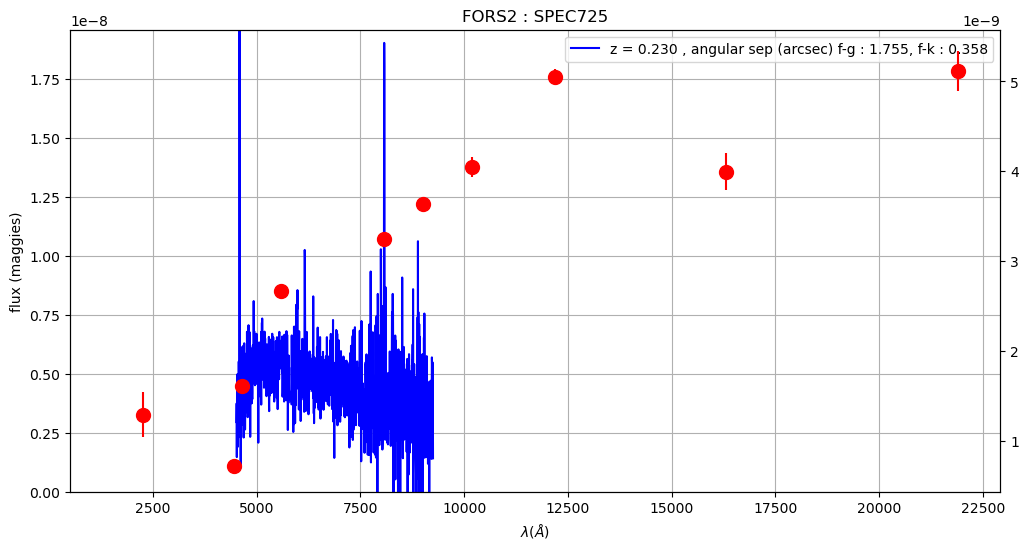

538  ==  727
b'[OII],[OIII],H{alpha}                                                       \r'


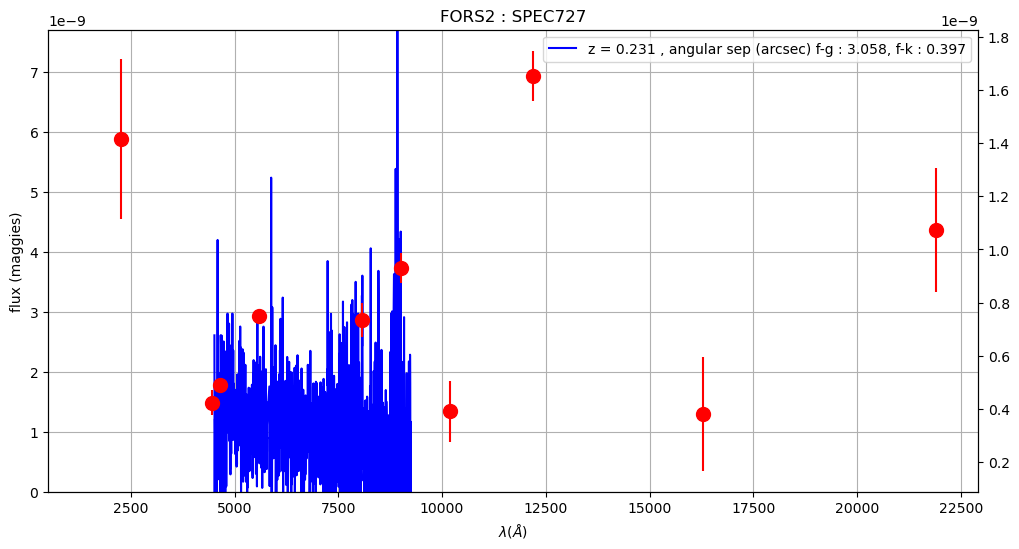

543  ==  732
b'H,K,H{gamma},H{beta},[OIII],H{alpha},NII                                    \r'


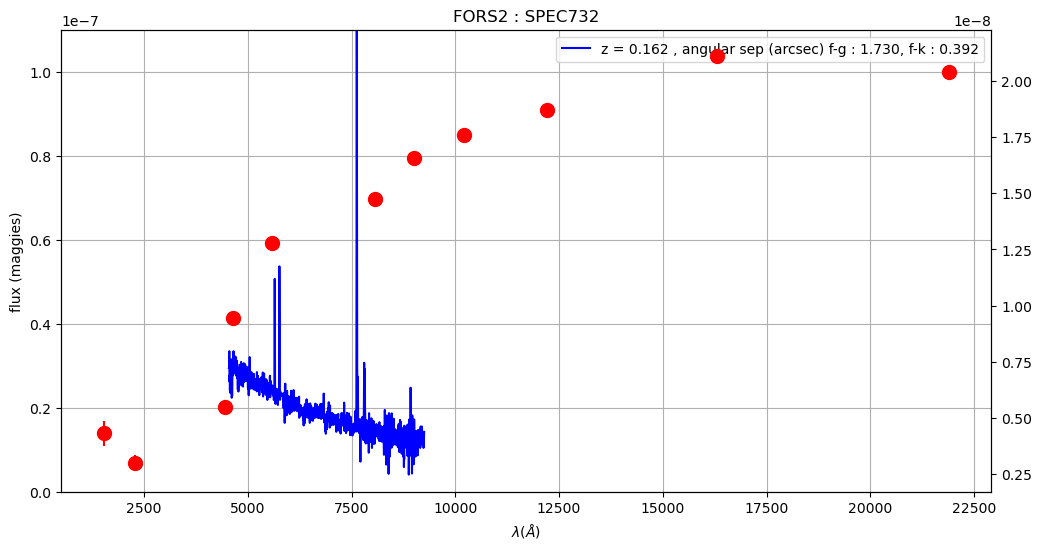

In [46]:
# loop on rows

for idx,row in df.iterrows():
    print(idx," == ",row["num"])
    
    mags = [ row["fuv_mag"], row["nuv_mag"], row['MAG_GAAP_u'], row['MAG_GAAP_g'], row['MAG_GAAP_r'], row['MAG_GAAP_i'], row['MAG_GAAP_Z'], row['MAG_GAAP_Y'], 
            row['MAG_GAAP_J'], row['MAG_GAAP_H'],row['MAG_GAAP_Ks'] ]
    
    magserr = [ row["fuv_magerr"], row["nuv_magerr"], row['MAGERR_GAAP_u'], row['MAGERR_GAAP_g'], row['MAGERR_GAAP_r'], row['MAGERR_GAAP_i'], row['MAGERR_GAAP_Z'], row['MAGERR_GAAP_Y'], 
            row['MAGERR_GAAP_J'], row['MAGERR_GAAP_H'],row['MAGERR_GAAP_Ks'] ]
    
    mfluxes = [ 10**(-0.4*m) for m in mags ]
    mfluxeserr = []
    
    for f,em in zip(mfluxes,magserr):
        ferr = 0.4*np.log10(10)*em*f
        mfluxeserr.append(ferr)
        
    
    
    fluxes =  [ row["fuv_flux"], row["nuv_flux"], row['FLUX_GAAP_u'], row['FLUX_GAAP_g'], row['FLUX_GAAP_r'], row['FLUX_GAAP_i'], row['FLUX_GAAP_Z'], row['FLUX_GAAP_Y'], 
            row['FLUX_GAAP_J'], row['FLUX_GAAP_H'],row['FLUX_GAAP_Ks'] ]
    
    fluxeserr =  [ row["fuv_fluxerr"], row["nuv_fluxerr"], row['FLUXERR_GAAP_u'], row['FLUXERR_GAAP_g'], row['FLUXERR_GAAP_r'], row['FLUXERR_GAAP_i'], row['FLUXERR_GAAP_Z'], row['FLUX_GAAP_Y'], 
            row['FLUXERR_GAAP_J'], row['FLUXERR_GAAP_H'],row['FLUXERR_GAAP_Ks'] ]
    
    
    fig = plt.figure(figsize=(12,6))
    ax=fig.add_subplot(1,1,1)
    
    z = row["redshift"]
    asep_fg = row['asep_galex']
    asep_fk = row['asep_kids']
    
    print(row["lines"])
    
    the_label = f"z = {z:.3f} , angular sep (arcsec) f-g : {asep_fg:.3f}, f-k : {asep_fk:.3f}" 
    ax.plot(all_df[idx]["wl"], all_df[idx]["fl"],'b-',label=the_label)
    #ax.plot(all_df[idx]["wl"], all_df[idx]["fl"],'b-',label=row["num"])
    
    
    ax2 = ax.twinx()
    
    ax2.errorbar(WL,mfluxes,yerr=mfluxeserr,fmt='o',color="r",ecolor="r",ms=10)
    #ax2.errorbar(WL, fluxes, yerr=fluxes, xerr=None, fmt='o', color="g",ecolor="g")

    ax.set_xlabel("$\lambda  (\AA)$ ")
    title = f"FORS2 : {key_tags[idx]}"
    ax.set_title(title)
    ax.set_ylabel("flux (maggies)")
    ax.legend()
    ax.grid()
    
    the_max = np.max(all_df[idx]["fl"])
    
    ax.set_ylim(0,the_max)
    
    plt.show()